In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
import json

from utils import create_dict, create_list, get_data, find_type2_locations, find_type3_locations, find_type4_locations
from utils import applyArtifacts, removeCells, avg_firing, NumpyEncoder, avg_amplitude, nrActiveCells, div_avg_firing, div_avg_amplitude, top_least
from utils import cellID, spindle_locs, search_spindle, spi_inOut_diff, zscore_calculator
from Analyses_ import slo_spi
%config Completer.use_jedi = False

### Input informations

In [2]:
all_address = ['L:/analysis_nima/250520_m18a/Batch_4', 'L:/analysis_nima/290520_m17a/Batch/extracells/Batch_2',
                'L:/analysis_nima/110620_m18b/new/Batch_3', 'L:/analysis_nima/050820_m21a/Batch_4',
                'L:/analysis_nima/030720_m20a/Batch_3', 'L:/analysis_nima/291020_m23a/Batch_2', 
               'L:/analysis_nima/210121_m24a/Batch_1']

# sampling rate for different mice
sfs = [30.995, 30.995, 30.955, 30.995, 30.995, 30.9576, 30.995]

# defining artifacts
custom_artifacts_1 = [[11007,11008,4]]
custom_artifacts_2 = [[11630,11947,0],[12000,12700,0],[4533,5154,14]]
custom_artifacts_3 = []
custom_artifacts_4 = [[1595,1845,0],[4609,4907,0],[7740,7983,0],[13795,14101,0],[16706,16973,0],
             [7266,7501,1],[11912,12219,1],[12703,13203,1],[13730,13909,1],[15097,15559,1],[17277,17519,1],
             [1416,1793,2],[3816,4123,2],[13254,13593,2],[15224,15703,2],[17668,18067,2],
             [7358,7521,3],[10240,10253,3],[13672,13748,3],[17306,17593,3],
             [5505,5939,4],[6222,6231,4],[16760,16820,4],[18450,18573,4],                           
             [1132,1357,7],[8653,8776,7],[9946,10391,7],
             [9068,9323,7],[13589,13623,7],[17394,17547,7],
             [1,140,8],[908,965,8],[7638,7665,8],[8014,8027,8],[14726,14922,8],[18022,18187,8],
             [1912,2381,9],[2920,2923,9],[7767,7819,9],[7864,7997,9],[9876,10197,9],[15206,15545,9],
             [6734,7220,10],[9668,9939,10],
             [8914,9290,11],[9562,9571,11],[12216,12339,11],
             [11492,11553,12],[13898,13919,12],
             [6298,6619,13],[12282,12795,13],[14406,14507,13],[14798,14875,13],
             [1,220,14],[1878,2108,14],[9872,9961,14],
             [4764,4813,15],[5564,5571,15],[15419,15595,15],[16003,16089,15],[16420,16482,15],
             [4240,4403,16],[9975,10077,16],[10274,10275,16],[13228,13451,16],[13805,13939,16],[14620,14664,16],[15764,15857,16],[18430,18537,16],
             [10425,10591,17],[11058,11709,17],[12232,12311,17],[12784,12804,17],[17000,17115,17],
             [10655,10825,18],[11993,12075,18],[12648,12685,18],[16013,16134,18],
             [14466,15015,19],[16876,17009,19],[18398,18573,19],
            [628,958,23],[7822,7976,23],[10298,10435,23],[13899,14241,23],[14466,14537,23],[15773,15848,23],[17664,17925,23],[18291,18426,23],
            [4309,4512,24],[5271,5467,24],[6450,6700,24],[7186,7593,24],
            [460,700,25],[1714,1725,25],[4045,4153,25],[13600,13699,25],
            [4434,4568,26],[5984,6167,26],
            [1770,1831,27],[4060,4064,27],
            [2000,2193,28],[11098,11334,28],
            [5921,5997,30],[8200,8210,30],[9189,9191,30],
            [686,852,31],[13375,13543,31],[14059,14334,31],[15808,15883,31],
            [10760,10800,33],[13942,14061,33],[17672,17738,33],
            [10576,10604,41]]
custom_artifacts_5 = [[3928,3971,0],[4584,4656,0],[7001,7119,0],[14144,14230,0],[14466,14501,0],[15591,15593,0],
            [559,603,1],[2187,2214,1],[3999,4054,1],[11749,11790,1],[17785,17839,1],
            [3403,3491,2],[11936,11980,2],
            [1397,1465,3],[13881,13889,3],[14510,14526,3],[18377,18441,3],                                                                                           
            [2585,2635,4], [6722,6771,4],[10867,10897,4],[16543,16615,4],
            [740,825,5],[2026,2113,5],[13025,13051,5],
            [798,863,6],[1795,1857,6],[3949,3980,6],[5190,5244,6],[10480,10547,6],[11219,11301,6],[12144,12191,6],[12690,12747,6],
            [1343,1441,7],[2618,2684,7],[2709,2713,7],[3427,3496,7],[4138,4185,7],[4532,4567,7],[5694,8768,7],[9513,9562,7],[12510,12644,7],[15000,15073,7],
            [96,140,8],[4175,4258,8],
            [409,564,9],[13291,13497,9],[16520,18573,9],
            [9968,10026,10],[14269,14335,10],[16569,16616,10],
            [404,557,11],[12553,12649,11],
            [503,598,13],[2832,2889,13],[13151,13218,13],[18276,18343,13],
            [769,954,14],[980,1001,14],[2324,2389,14],[4286,4297,14],
            [3349,3447,15],[6128,6221,15],
            [8475,8543,16],
            [9792,9840,17],
            [2984,3007,20],[4131,4183,20],[5025,5042,20],[6330,6355,20],[11818,11893,20],
            [6760,6875,21],
            [12871,12895,28],[13645,13667,28],[14232,14319,28],[14837,14849,28],[15521,15542,28],[16421,16445,28],[17032,17040,28]]
custom_artifacts_6 = [[8863,9191,4],
           [5389,5393,7],[5575,5607,7],[5754,5755,7],[5798,6000,7],
            [11050,11070,10],[12260,12280,10],
            [15125,15290,12],[16420,18160,10],
            [13280,13340,13],
            [8,23,15],[92,94,15],[481,505,15],
            [10035,10500,20],[11024,11044,20],
            [5794,5800,21],
            [3501,3507,22]]
custom_artifacts_7 = [[0,3418,0],[13116,13507,0],[14502,14872,0],
              [8000,9000,2],
              [1828,2638,3],[8631,12630,3],
              [1497,1988,4],[16470,17270,4],
              [5113,8239,5],                                                                                         
              [2322,2978,6],
              [12460,14890,7],
              [15600,16060,10],
              [4231,4848,11],[6434,6909,11],[9110,11550,11],
              [11890,12380,12],
              [8410,8820,13],
              [3026,3515,14],[13810,14170,14],
              [10910,12010,15]]  
artifacts = [custom_artifacts_1, custom_artifacts_2, custom_artifacts_3,
                custom_artifacts_4, custom_artifacts_5, custom_artifacts_6, custom_artifacts_7]

# cell removal 
remove_cell_1 = []
remove_cell_2 = []
remove_cell_3 = [62,63,64,65,66,67,68,69,70,80,81,160,161,162,163,164,167,194,195,202,203,204]
remove_cell_4 = [13,53,55,57,79,84,85,86,95,99,112,141,144,147,153,177,178,183,184,188,189,191,196,197,198,199,202,219,226,234,235]
remove_cell_5 = []
remove_cell_6 = [66,84,85,86]
remove_cell_7 = []
remove_cells = [remove_cell_1, remove_cell_2, remove_cell_3,
              remove_cell_4, remove_cell_5, remove_cell_6, remove_cell_7]
# mouse name
miceName = ['250520_m18a', '290520_m17a', '110620_m18b', '050820_m21a', '030720_m20a', '291020_m23a', '210121_m24a']

# mouse name indcies
mouse_index = {miceName[0]:0, miceName[1]:1, miceName[2]:2, miceName[3]:3, miceName[4]:4, miceName[5]:5, miceName[6]:6}


# saving figure 
save_fig = True # or False
fig_save_add = ''


# saving dataframes
save_file = True # or False
file_save_add = ''

### Creating base data structure and loading data and hypno to it
####    If ncessary first apply artifact on data or remove cells then create data structure

In [3]:
apply_artifact = True
rmCell = True

data_list = []
for address, sf, mouse_name, artifact, remove_cell in zip(all_address, sfs, miceName, artifacts, remove_cells):
    
    #clear and read data
    data = []; hypno = []
    data, hypno = get_data(address = address, sf = sf)
    
    if apply_artifact:
        data = applyArtifacts(data=data, artifacts=artifact)
    
    if rmCell:
        data = removeCells(data=data, cells = remove_cell)
    
    # creat per mouse list
    data_list.extend(create_list(data = data, hypno = hypno, mouseName = mouse_name, 
                                 sf = sf, apply_artifact=apply_artifact, removeCell=rmCell))

Your entered path is L:/analysis_nima/250520_m18a/Batch_4
All files in the given path 

['unit01.mat', 'unit02.mat', 'unit03.mat', 'unit04.mat', 'unit05.mat', 'unit06.mat', 'unit07.mat', 'unit08.mat', 'unit09.mat', 'unit10.mat', 'unit11.mat', 'unit12.mat', 'unit13.mat', 'unit14.mat', 'unit15.mat', 'unit16.mat', 'unit17.mat', 'unit18.mat', 'unit19.mat', 'unit20.mat', 'unit21.mat', 'unit22.mat', 'unit23.mat', 'unit24.mat', 'unit25.mat', 'unit26.mat', 'unit27.mat', 'unit28.mat', 'unit29.mat', 'unit30.mat', 'unit31.mat', 'unit32.mat', 'unit33.mat', 'unit34.mat', 'unit35.mat', 'unit36.mat', 'unit37.mat', 'unit38.mat', 'unit39.mat', 'unit40.mat', 'unit41.mat', 'unit42.mat', 'unit43.mat', 'unit44.mat', 'unit45.mat']  Number of all files 45
Data are loaded 

Start reading units 

unit length is 600 sec, data length is 18597 samples, number of cells are 236 

Finished reading units 

Start reading hypno files 

Finished reading hypno 

Location-Time information
data and hypno shapes in file L:/

### Adding analyses as dictionary key, value pairs

In [4]:
# add average firing rate to the dictionary
[data_dict.update({'avg_firing_perSecond':avg_firing(data = data_dict['data'], 
                                                            sf=data_dict['samplingRate'])}) for data_dict in data_list];

In [ ]:
# add average amplitude to the dictionary
[data_dict.update({'avg_amplitude':avg_amplitude(data = data_dict['data'])}) for data_dict in data_list];

C:\Users\admin\Sleep_Pipeline_Notebooks\Analysis_all_mice\SleepAnalyses\utils.py:229: RuntimeWarning: Mean of empty slice
  return np.nanmean(np.where(data>0 , data, np.nan), axis = 0)


In [ ]:
# zscore normalization of avg firing rate. Normalization is applied per cell for each individual mouse separately
data_list = zscore_calculator(dataBase = data_list, mouse_name_list=miceName, variable = "frequency")

# zscore normalization of avg amplitude. Normalization is applied per cell for each individual mouse separately
data_list = zscore_calculator(dataBase = data_list, mouse_name_list=miceName, variable = "amplitude")


In [ ]:
# add top and least firing rate 
fraction = 20

#top
[data_dict.update({'top' + str(fraction) + '_avg_firing':top_least(data=data_dict['avg_firing_perSecond'], 
                                                                   prc = fraction, top = True)}) for data_dict in data_list];

#least
[data_dict.update({'least' + str(fraction) + '_avg_firing':top_least(data=data_dict['avg_firing_perSecond'], 
                                                                   prc = fraction, top = False)}) for data_dict in data_list];


#top-zscore
[data_dict.update({'top' + str(fraction) + '_avg_firing_zscore':top_least(data=data_dict['avg_firing_perSecond_zscore'], 
                                                                   prc = fraction, top = True)}) for data_dict in data_list];

#least-zscore
[data_dict.update({'least' + str(fraction) + '_avg_firing_zscore':top_least(data=data_dict['avg_firing_perSecond_zscore'], 
                                                                   prc = fraction, top = False)}) for data_dict in data_list];

In [ ]:
# add top and least amplitude 
fraction = 20

#top
[data_dict.update({'top' + str(fraction) + '_amplitude':top_least(data=data_dict['avg_amplitude'], 
                                                                   prc = fraction, top = True)}) for data_dict in data_list];

#least
[data_dict.update({'least' + str(fraction) + '_amplitude':top_least(data=data_dict['avg_amplitude'], 
                                                                   prc = fraction, top = False)}) for data_dict in data_list];


#top-zscore
[data_dict.update({'top' + str(fraction) + '_amplitude_zscore':top_least(data=data_dict['avg_amplitude_zscore'], 
                                                                   prc = fraction, top = True)}) for data_dict in data_list];

#least-zscore
[data_dict.update({'least' + str(fraction) + '_amplitude_zscore':top_least(data=data_dict['avg_amplitude_zscore'], 
                                                                   prc = fraction, top = False)}) for data_dict in data_list];

In [ ]:
# add divided average firing rate to the dictionary
[data_dict.update({'div_avg_firing_perSecond':div_avg_firing(data = data_dict['data'], 
                                                             sf=data_dict['samplingRate'], 
                                                             n = 3)}) for data_dict in data_list];

# zscore normalization of avg firing rate. Normalization is applied per cell for each individual mouse separately
data_list = zscore_calculator(dataBase = data_list, mouse_name_list=miceName, variable = "frequency", divided_data=True)

In [ ]:
# add divided average firing rate to the dictionary (n subdata)
[data_dict.update({'div_avg_amplitude':div_avg_amplitude(data = data_dict['data'], n=3)}) for data_dict in data_list];

# zscore normalization of avg amplitude. Normalization is applied per cell for each individual mouse separately
data_list = zscore_calculator(dataBase = data_list, mouse_name_list=miceName, variable = "amplitude", divided_data= True)

In [ ]:
# add epoch duration in sample
[data_dict.update({'epochDuration': data_dict['data'].shape[0]}) for data_dict in data_list];

In [ ]:
# add nr of active cell per epoch
[data_dict.update({'nrActiveCells': nrActiveCells(data = data_dict['avg_amplitude'])}) for data_dict in data_list];

In [ ]:
# add nr of total cells per epoch
[data_dict.update({'nrTotalCells': data_dict['data'].shape[1]}) for data_dict in data_list];

In [ ]:
# adding location of type2 pattern to the dictionaries


# type2: 1 epoch is first element of the pattern
#        2 epoch is second element of the pattern
#        0 epoch is not involved in the pattern


# finding locations (each location is the location of first element of the pattern)
type2_locations = find_type2_locations(dictLists=data_list, pattern=[-2, -3], 
                                       cond1_min= 900, cond1_max=10000, 
                                       cond2_min=900, cond2_max=10000)



[data_dict.update({'type2': 0}) for data_dict in data_list]

for i, data_dict in enumerate(data_list):
    if i in type2_locations:
        data_dict.update({'type2':1})
        data_list[i+1].update({'type2':2})

In [ ]:
# adding location of type3 pattern to the dictionaries


# type2: 1 epoch is first element of the pattern
#        2 epoch is second element of the pattern
#        3 epoch is third element of the pattern
#        0 epoch is not involved in the pattern


# finding locations (each location is the location of first element of the pattern)
type3_locations = find_type3_locations(dictLists=data_list, pattern=[-2, -3, -2], 
                                       cond1_min= 900, cond1_max=10000, 
                                       cond2_min=900, cond2_max=10000, 
                                       cond3_min=900, cond3_max=10000)



[data_dict.update({'type3': 0}) for data_dict in data_list]

for i in range(type3_locations.shape[0]):
    
    data_list[type3_locations[i,0]].update({'type3':1})
    data_list[type3_locations[i,1]].update({'type3':2})
    data_list[type3_locations[i,2]].update({'type3':3})

# Plotting of analyses

#### Average firing rate - Dot plot per state and per mouse

#### Frequency per mouse

In [ ]:
df_avg_firingRate = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 900 and x['epochDuration'] < 10000), data_list))

for i, indDict in enumerate(temp_list):
    df_avg_firingRate = df_avg_firingRate.append(pd.DataFrame({'avg_firingRate':indDict['avg_firing_perSecond'],
                                                               'number_of_cells':list(range(len(indDict['avg_firing_perSecond']))),
                                                               'name':indDict['mouseName'], 
                                                               'state': indDict['hypnoState']}), ignore_index = True)
    
    


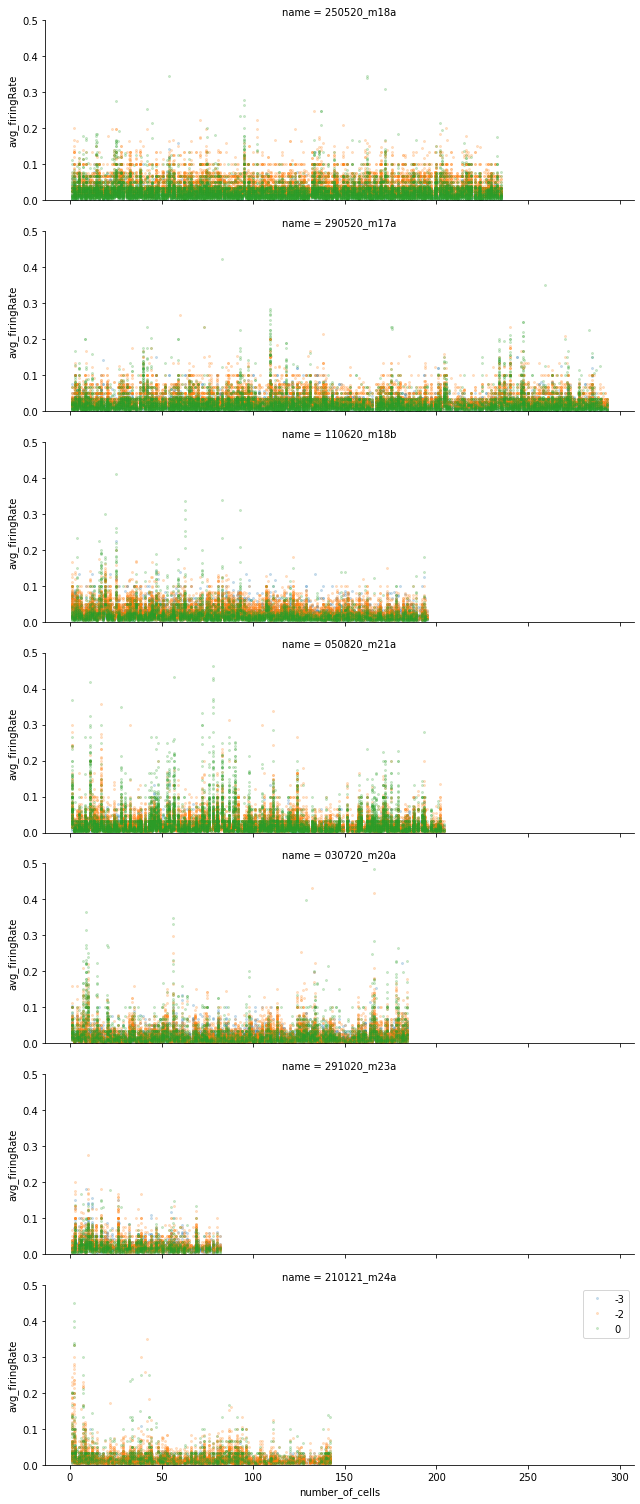

In [ ]:
grid = sns.FacetGrid(df_avg_firingRate, col="name", hue="state",
                     col_wrap=1, aspect=3, ylim=[0, 0.5])

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, 'number_of_cells', "avg_firingRate", marker = '.', markersize = 4, linestyle='', alpha = 0.2)
plt.legend()
# Adjust the tick positions and labels
#grid.set(ylim=(-3.5, 3.5))


if save_fig:
    plt.savefig(fig_save_add + '/average_firing_rate_dotPlot.pdf', dpi=300, format='pdf')
if save_file:
    df_avg_firingRate.to_csv(path_or_buf=file_save_add + '/average_firing_rate.csv')

#### Amplitude - Dot plot per state and per mouse

In [ ]:


df_avg_amplitude = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 930 and x['epochDuration'] < 10000), data_list))

for indDict in temp_list:
    df_avg_amplitude = df_avg_amplitude.append(pd.DataFrame({'avg_amplitude':indDict['avg_amplitude'],
                                                               'number_of_cells':list(range(len(indDict['avg_amplitude']))),
                                                               'name':indDict['mouseName'], 
                                                               'state': indDict['hypnoState']}), ignore_index = True)

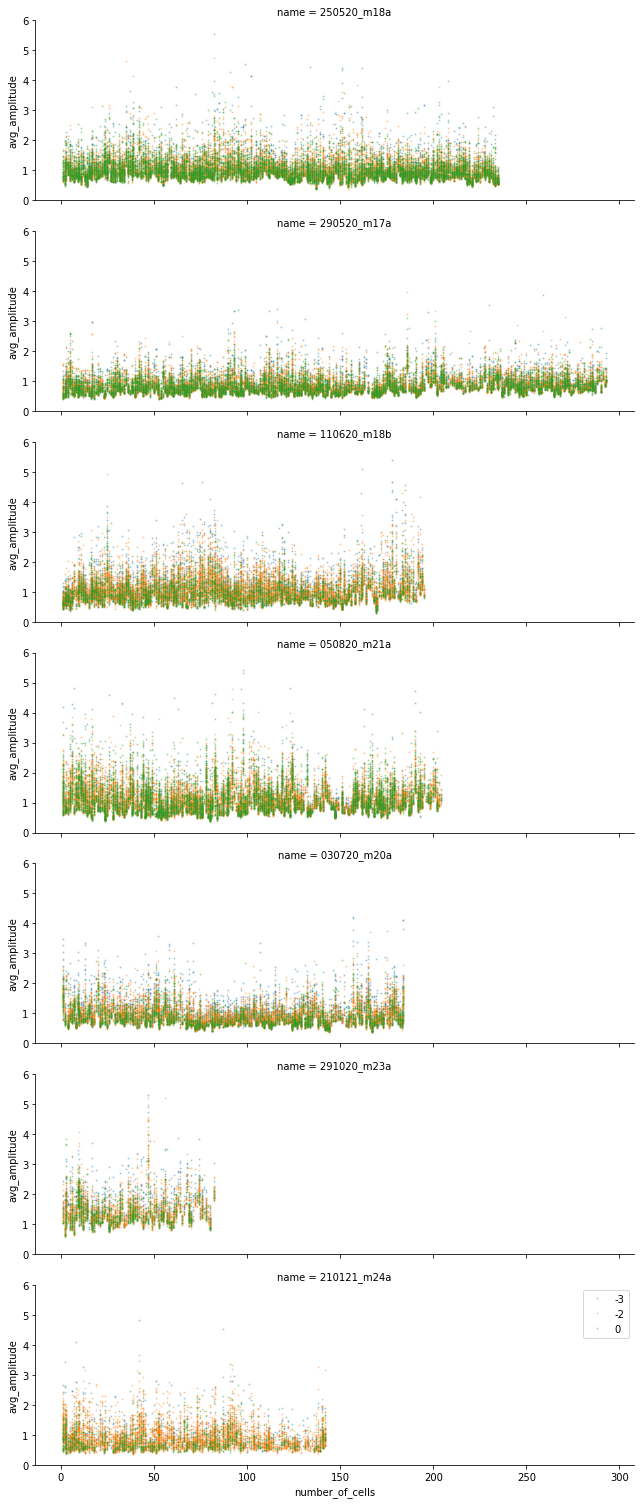

In [ ]:
grid = sns.FacetGrid(df_avg_amplitude, col="name", hue="state",
                     col_wrap=1, aspect=3, ylim=[0,6])

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, 'number_of_cells', "avg_amplitude", marker = '.', markersize = 2, linestyle='', alpha = 0.3)
plt.legend()



### Average firing rate - violin plot- per state and per mouse

#### Frequency

In [ ]:
# average firing rate for epoch duration between 30 sec to 5 min

df_avg_firingRate = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 900 and x['epochDuration'] < 10000), data_list))

for i, indDict in enumerate(temp_list):

    df_avg_firingRate = df_avg_firingRate.append(pd.DataFrame({'avg_firingRate':[np.nanmean(indDict['avg_firing_perSecond'])], 
                                                               'name':indDict['mouseName'], 
                                                               'state': indDict['hypnoState'], 
                                                               'epochID': i}), ignore_index = True)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


(-0.025, 0.15)

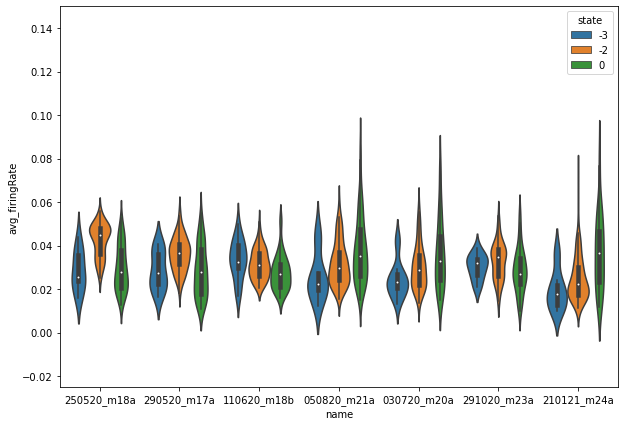

In [ ]:
if save_file:
    df_avg_firingRate.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/violin_plot_avg_fr/average_firing_rate.csv')
plt.figure(figsize=(10,7))
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/violin_plot_avg_fr/average_firing_rate_violinPlot.pdf', dpi=300, format='pdf')
sns.violinplot(data=df_avg_firingRate, y='avg_firingRate', x = 'name', hue='state')
plt.ylim([-0.025, 0.15])

#### Frequency - only top x %

In [ ]:
# average firing rate for epoch duration between 30 sec to 5 min

df_avg_firingRate = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 930 and x['epochDuration'] < 10000), data_list))

for i, indDict in enumerate(temp_list):
    df_avg_firingRate = df_avg_firingRate.append(pd.DataFrame({'avg_firingRate':[np.nanmean(indDict['avg_firing_perSecond'][indDict['top20_avg_firing'][0]])], 
                                                               'name':indDict['mouseName'], 
                                                               'state': indDict['hypnoState'], 
                                                               'epochID': i}), ignore_index = True)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


In [ ]:
 df_avg_firingRate.shape

(1261, 4)

(-0.025, 0.15)

<Figure size 432x288 with 0 Axes>

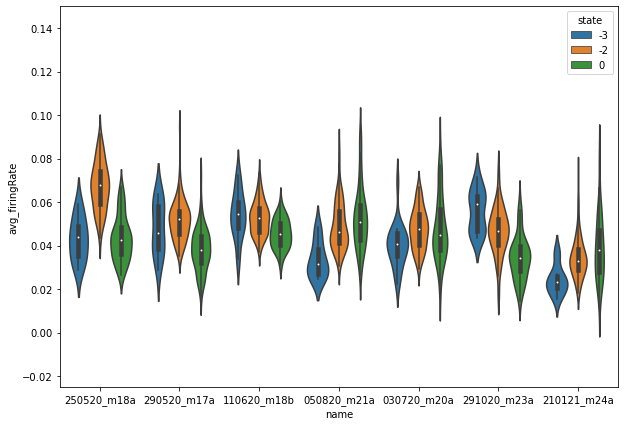

In [ ]:
if save_file:
    df_avg_firingRate.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/violin_plot_avg_fr/average_firing_rate_only_top20%.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/violin_plot_avg_fr/average_firing_rate_only_top20%.pdf', dpi=300, format='pdf')
plt.figure(figsize=(10,7))
sns.violinplot(data=df_avg_firingRate, y='avg_firingRate', x = 'name', hue='state')
plt.ylim([-0.025, 0.15])

#### Frequency least x%

In [ ]:
# average firing rate for epoch duration between 30 sec to 5 min

df_avg_firingRate = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 930 and x['epochDuration'] < 10000), data_list))

for i, indDict in enumerate(temp_list):
    df_avg_firingRate = df_avg_firingRate.append(pd.DataFrame({'avg_firingRate':[np.nanmean(indDict['avg_firing_perSecond'][indDict['least20_avg_firing'][0]])], 
                                                               'name':indDict['mouseName'], 
                                                               'state': indDict['hypnoState'], 
                                                               'epochID': i}), ignore_index = True)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


(-0.025, 0.15)

<Figure size 432x288 with 0 Axes>

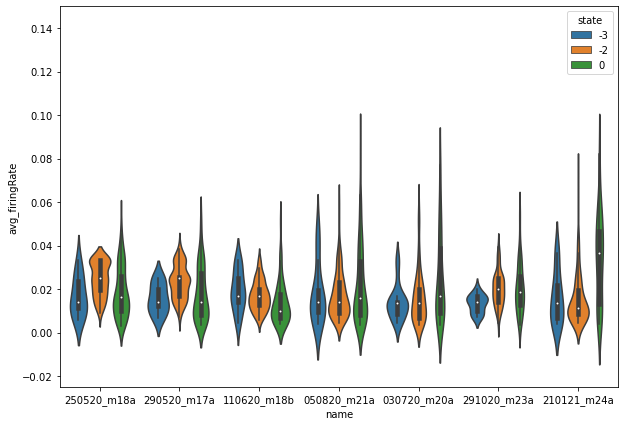

In [ ]:
if save_file:
    df_avg_firingRate.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/violin_plot_avg_fr/average_firing_rate_only_least20%.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/violin_plot_avg_fr/average_firing_rate_only_least20%.pdf', dpi=300, format='pdf')
plt.figure(figsize=(10,7))
sns.violinplot(data=df_avg_firingRate, y='avg_firingRate', x = 'name', hue='state')
plt.ylim([-0.025, 0.15])

In [ ]:
 df_avg_firingRate.shape

(48344, 4)

#### Frequency based on top x% of amplitude

In [ ]:
 df_avg_firingRate.shape

(48344, 4)

In [ ]:
# average firing rate for epoch duration between 30 sec to 5 min

df_avg_firingRate = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 930 and x['epochDuration'] < 10000), data_list))

for i, indDict in enumerate(temp_list):
    df_avg_firingRate = df_avg_firingRate.append(pd.DataFrame({'avg_firingRate':[np.nanmean(indDict['avg_firing_perSecond'][indDict['top20_amplitude'][0]])], 
                                                               'name':indDict['mouseName'], 
                                                               'state': indDict['hypnoState'], 
                                                               'epochID': i}), ignore_index = True)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


(-0.025, 0.15)

<Figure size 432x288 with 0 Axes>

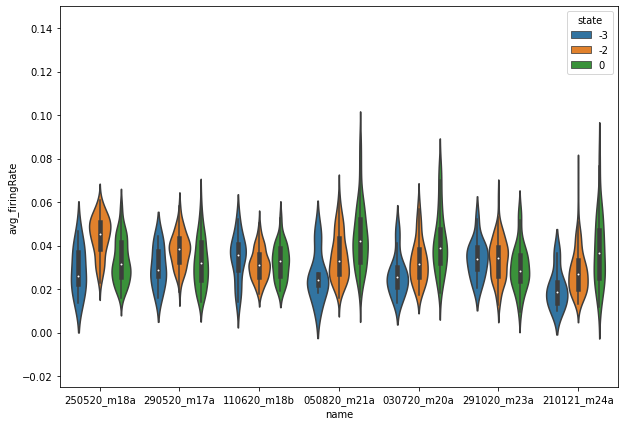

In [ ]:
if save_file:
    df_avg_firingRate.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/violin_plot_avg_fr/average_firing_rate_fr_based_on_top20%_amp.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/violin_plot_avg_fr/average_firing_rate_fr_based_on_top20%_amp.pdf', dpi=300, format='pdf')
plt.figure(figsize=(10,7))
sns.violinplot(data=df_avg_firingRate, y='avg_firingRate', x = 'name', hue='state')
plt.ylim([-.025, 0.15])

#### Frequency based on least x% of amplitude

In [ ]:
# average firing rate for epoch duration between 30 sec to 5 min

df_avg_firingRate = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 930 and x['epochDuration'] < 10000), data_list))

for i, indDict in enumerate(temp_list):
    df_avg_firingRate = df_avg_firingRate.append(pd.DataFrame({'avg_firingRate':[np.nanmean(indDict['avg_firing_perSecond'][indDict['least20_amplitude'][0]])], 
                                                               'name':indDict['mouseName'], 
                                                               'state': indDict['hypnoState'], 
                                                               'epochID': i}), ignore_index = True)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


In [ ]:
 df_avg_firingRate.shape

(48344, 4)

(-0.025, 0.15)

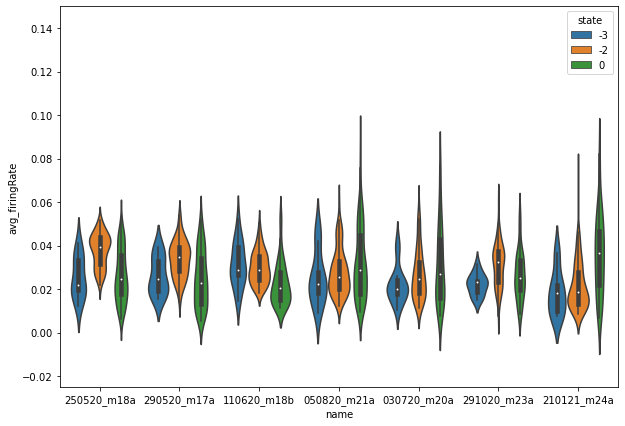

In [ ]:
if save_file:
    df_avg_firingRate.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/violin_plot_avg_fr/average_firing_rate_fr_based_on_least20%_amp.csv')
plt.figure(figsize=(10,7))
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/violin_plot_avg_fr/average_firing_rate_fr_based_on_least20%_amp.pdf', dpi=300, format='pdf')
sns.violinplot(data=df_avg_firingRate, y='avg_firingRate', x = 'name', hue='state')
plt.ylim([-.025, 0.15])

#### Amplitude

In [ ]:
# average firing rate for epoch duration between 30 sec to 5 min

df_avg_amplitude = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 900 and x['epochDuration'] < 10000), data_list))

for i, indDict in enumerate(temp_list):
    df_avg_amplitude = df_avg_amplitude.append(pd.DataFrame({'avg_amplitude':[np.nanmean(indDict['avg_amplitude'])], 
                                                             'name':indDict['mouseName'], 
                                                             'state': indDict['hypnoState'], 
                                                             'epochID': i}), ignore_index = True)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


In [ ]:
 df_avg_amplitude.shape

(1261, 4)

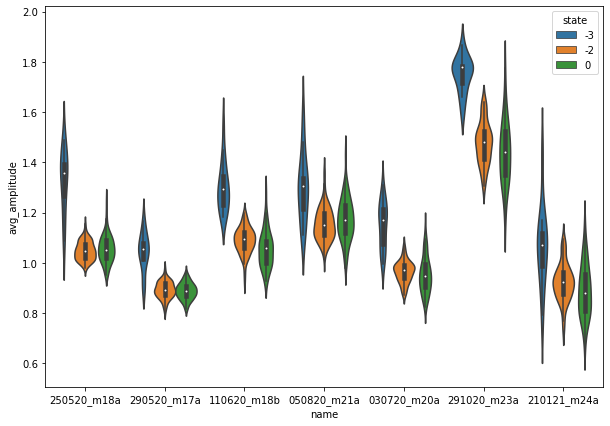

In [ ]:
if save_file:
    df_avg_amplitude.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/violin_plot_avg_amp/average_amp.csv')

plt.figure(figsize=(10,7))
sns.violinplot(data=df_avg_amplitude, y='avg_amplitude', x = 'name', hue='state')
#plt.ylim([-.025, 0.15])
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/violin_plot_avg_amp/average_amp.pdf', dpi=300, format='pdf')

#### Amplitude based on top x%

In [ ]:
# average firing rate for epoch duration between 30 sec to 5 min

df_avg_amplitude = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 930 and x['epochDuration'] < 10000), data_list))

for i, indDict in enumerate(temp_list):
    df_avg_amplitude = df_avg_amplitude.append(pd.DataFrame({'avg_amplitude':[np.nanmean(indDict['avg_amplitude'][indDict['top20_amplitude'][0]])], 
                                                             'name':indDict['mouseName'], 
                                                             'state': indDict['hypnoState'], 
                                                             'epochID': i}), ignore_index = True)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


In [ ]:
 df_avg_amplitude.shape

(48344, 4)

<AxesSubplot:xlabel='name', ylabel='avg_amplitude'>

<Figure size 432x288 with 0 Axes>

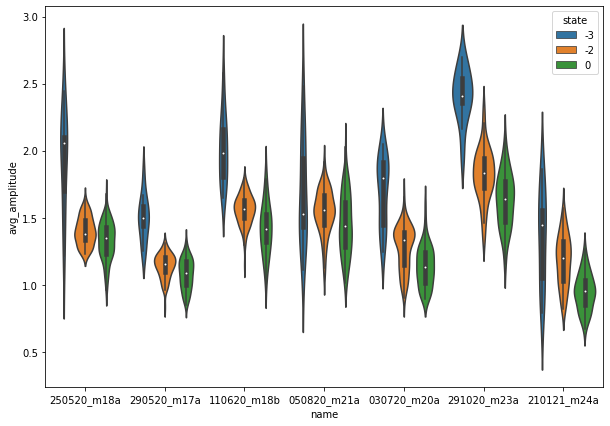

In [ ]:
if save_file:
    df_avg_amplitude.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/violin_plot_avg_amp/average_amp_only_top20%.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/violin_plot_avg_amp/average_amp_only_top20%.pdf', dpi=300, format='pdf')
plt.figure(figsize=(10,7))
sns.violinplot(data=df_avg_amplitude, y='avg_amplitude', x = 'name', hue='state')
#plt.ylim([-.05, 0.2])

#### Amplitude based on least x%

In [ ]:
# average firing rate for epoch duration between 30 sec to 5 min

df_avg_amplitude = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 930 and x['epochDuration'] < 10000), data_list))

for i, indDict in enumerate(temp_list):
    df_avg_amplitude = df_avg_amplitude.append(pd.DataFrame({'avg_amplitude':[np.nanmean(indDict['avg_amplitude'][indDict['least20_amplitude'][0]])], 
                                                             'name':indDict['mouseName'], 
                                                             'state': indDict['hypnoState'], 
                                                             'epochID': i}), ignore_index = True)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


In [ ]:
 df_avg_amplitude.shape

(48344, 4)

<AxesSubplot:xlabel='name', ylabel='avg_amplitude'>

<Figure size 432x288 with 0 Axes>

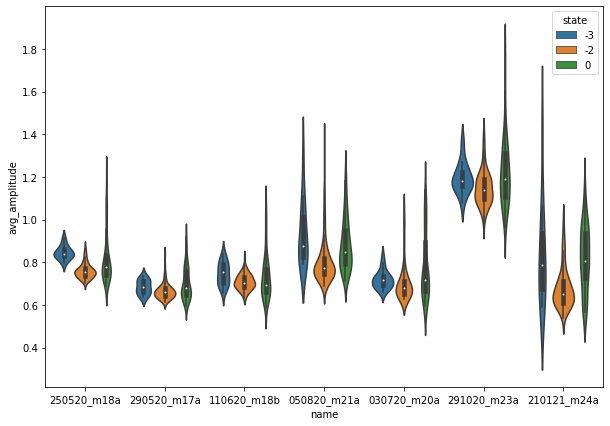

In [ ]:
if save_file:
    df_avg_amplitude.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/violin_plot_avg_amp/average_amp_only_least20%.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/violin_plot_avg_amp/average_amp_only_least20%.pdf', dpi=300, format='pdf')
plt.figure(figsize=(10,7))
sns.violinplot(data=df_avg_amplitude, y='avg_amplitude', x = 'name', hue='state')
#plt.ylim([-.05, 0.2])

#### Amplitude based on top x% of firing rate

In [ ]:
# average firing rate for epoch duration between 30 sec to 5 min

df_avg_amplitude = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 930 and x['epochDuration'] < 10000), data_list))

for i, indDict in enumerate(temp_list):
    df_avg_amplitude = df_avg_amplitude.append(pd.DataFrame({'avg_amplitude':[np.nanmean(indDict['avg_amplitude'][indDict['top20_avg_firing'][0]])], 
                                                             'name':indDict['mouseName'], 
                                                             'state': indDict['hypnoState'], 
                                                             'epochID': i}), ignore_index = True)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


In [ ]:
 df_avg_amplitude

avg_amplitude         name  state  epochID
0          1.006843  250520_m18a      0        0
1          1.069475  250520_m18a      0        1
2          1.072557  250520_m18a     -2        2
3          1.032056  250520_m18a      0        3
4          1.041279  250520_m18a     -2        4
...             ...          ...    ...      ...
1256       1.061408  210121_m24a     -2     1256
1257       1.004695  210121_m24a     -2     1257
1258       1.038764  210121_m24a      0     1258
1259       1.057346  210121_m24a     -2     1259
1260       1.035296  210121_m24a      0     1260

[1261 rows x 4 columns]

<AxesSubplot:xlabel='name', ylabel='avg_amplitude'>

<Figure size 432x288 with 0 Axes>

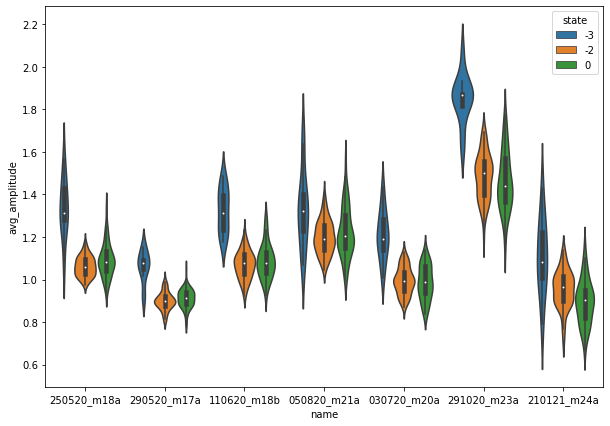

In [ ]:
if save_file:
    df_avg_amplitude.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/violin_plot_avg_amp/average_amp_based_on_top_20%_fr.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/violin_plot_avg_amp/average_amp_based_on_top_20%_fr.pdf', dpi=300, format='pdf')
plt.figure(figsize=(10,7))
sns.violinplot(data=df_avg_amplitude, y='avg_amplitude', x = 'name', hue='state')
#plt.ylim([-.05, 0.2])

#### Amplitude based on least x% of firing rate

In [ ]:
# average firing rate for epoch duration between 30 sec to 5 min

df_avg_amplitude = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 930 and x['epochDuration'] < 10000), data_list))

for i, indDict in enumerate(temp_list):
    df_avg_amplitude = df_avg_amplitude.append(pd.DataFrame({'avg_amplitude':[np.nanmean(indDict['avg_amplitude'][indDict['least20_avg_firing'][0]])], 
                                                             'name':indDict['mouseName'], 
                                                             'state': indDict['hypnoState'], 
                                                             'epochID': i}), ignore_index = True)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


<AxesSubplot:xlabel='name', ylabel='avg_amplitude'>

<Figure size 432x288 with 0 Axes>

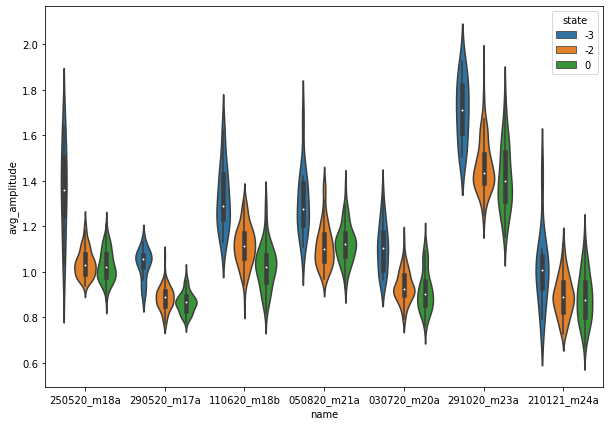

In [ ]:
if save_file:
    df_avg_amplitude.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/violin_plot_avg_amp/average_amp_based_on_least_20%_fr.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/violin_plot_avg_amp/average_amp_based_on_least_20%_fr.pdf', dpi=300, format='pdf')
plt.figure(figsize=(10,7))
sns.violinplot(data=df_avg_amplitude, y='avg_amplitude', x = 'name', hue='state')
#plt.ylim([-.05, 0.2])

### Average firing rate - histogram

#### Histogram of Frequency per mouse

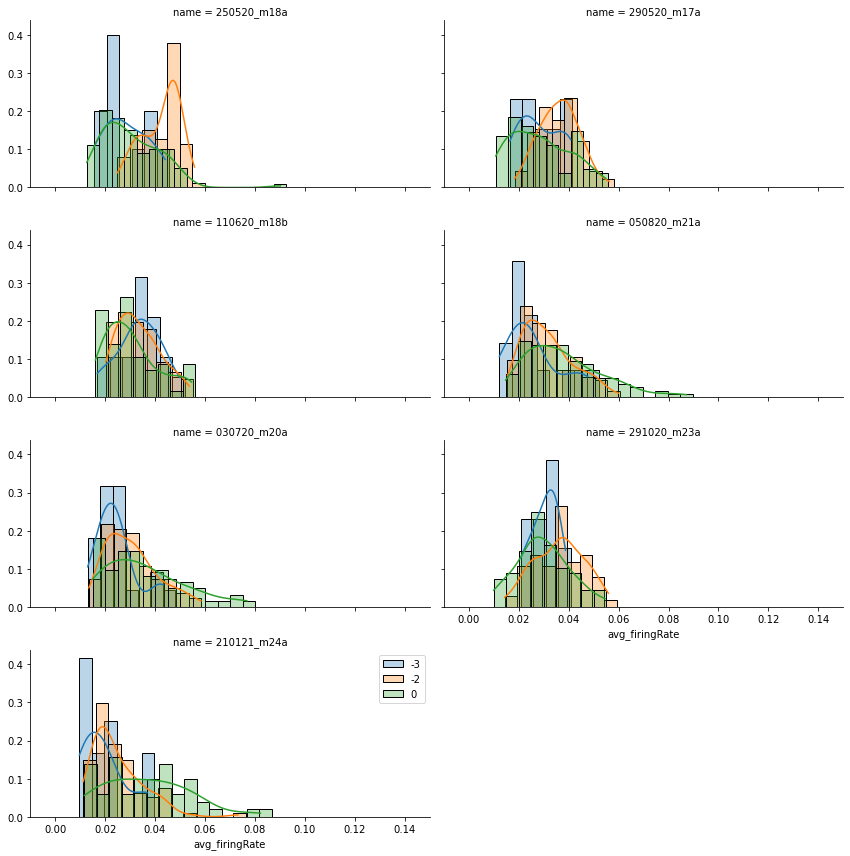

In [ ]:
# MAKE per mouse graph (FACET)
grid = sns.FacetGrid(df_avg_firingRate, col="name", hue="state",
                     col_wrap=2, aspect=2, xlim=[-.01, 0.15])

grid.map(sns.histplot, 'avg_firingRate', kde = True, stat = 'probability', 
         binwidth = .005, element = 'bars', common_norm = False, alpha = .3);
plt.legend()

#### Histogram of Frequency all mice

In [ ]:
#df_temp = pd.DataFrame()
#df_temp = df_avg_firingRate(id_vars=['name', 'state', 'epochID'], var_name='level', value_name='firing_rate')

x = df_avg_firingRate.groupby(by = ["avg_firingRate_zscore"], as_index=False).last()

grid = sns.FacetGrid(x, hue="state", palette= 'bright')
sns.set({'figure.figsize':(11.7,8.27)})
#sns.color_palette= 'deep'
grid.map(sns.histplot, 'avg_firingRate',kde = True, stat = 'probability', 
         binwidth = .005, element = 'bars',common_norm = False, alpha = .3);
#plt.ylim(0,0.3)
#plt.xlim(0,0.1)
plt.legend()
#if save_fig:
  #  plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/histogram_avg_fr/Avg_firing_rate_all_mice.pdf', dpi=600,) 

#### Boxplot of Frequency all mice

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


(0.0, 0.08)

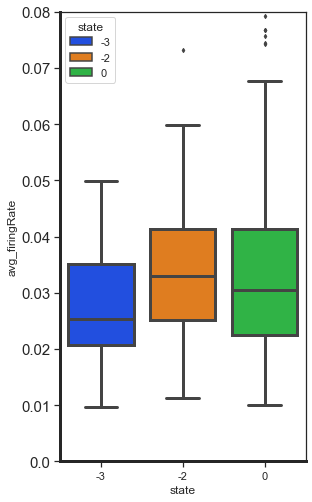

In [ ]:
x = df_avg_firingRate

sns.set(rc={'figure.figsize':(4.4,8.27)})
sns.set_style("ticks")
g=sns.boxplot(x="state", y="avg_firingRate",hue = 'state', palette= 'bright',dodge=False,fliersize=3,linewidth=3,data=df_avg_firingRate )
#plt.ylim(0,.2)
g.set_yticklabels(g.get_yticks(), size = 15)
#g.set_xticklabels(['SWS','Awake','REM'])
g.spines['left'].set_linewidth(3)
g.spines['bottom'].set_linewidth(3)
#g.spines['right'].set_linewidth(3)
plt.ylim(0,0.08)

#if save_fig:
 #   plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/histogram_avg_fr/boxplot_firing_rate_all_mice.pdf', dpi=1200,) 

#### Histogram of Ampitude for mouse

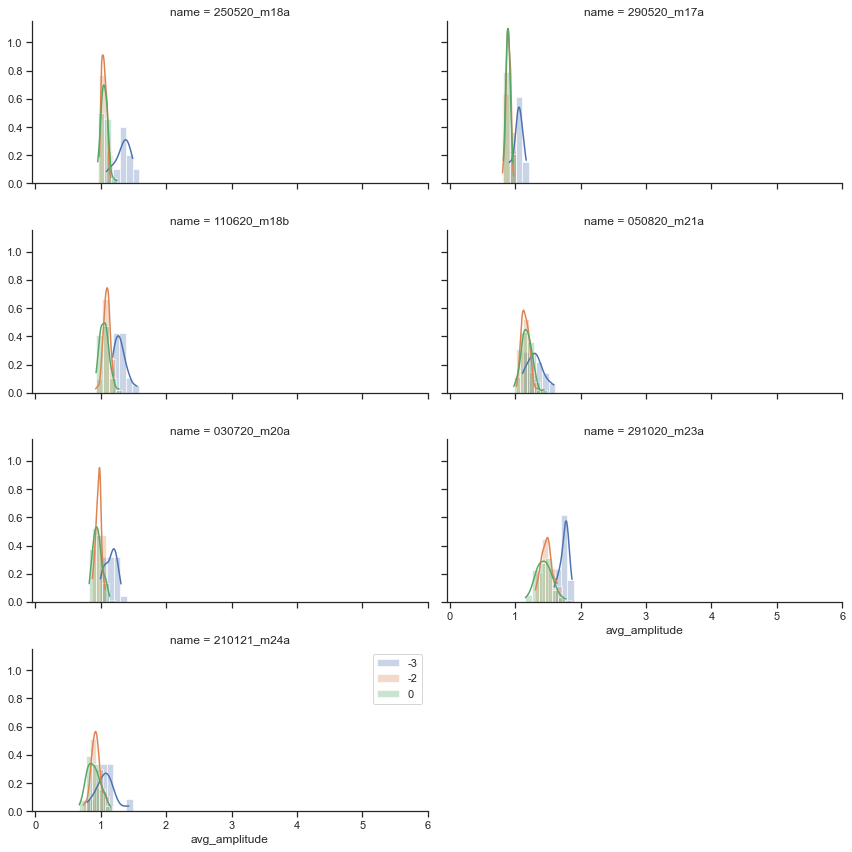

In [ ]:
# MAKE per mouse graph (FACET)
grid = sns.FacetGrid(df_avg_amplitude, col="name", hue="state",
                     col_wrap=2, aspect=2, xlim=[-.05, 6])

grid.map(sns.histplot, 'avg_amplitude', kde = True, stat = 'probability', 
         binwidth = .1, element = 'bars', common_norm = False, alpha = .3);
plt.legend()

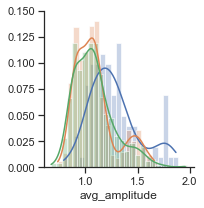

In [ ]:
#df_temp = pd.DataFrame()
#df_temp = df_avg_firingRate(id_vars=['name', 'state', 'epochID'], var_name='level', value_name='firing_rate')

x = df_avg_amplitude.groupby(by = ["avg_amplitude"], as_index=False).last()

grid = sns.FacetGrid(x, hue="state")
sns.set({'figure.figsize':(11.7,8.27)})
grid.map(sns.histplot, 'avg_amplitude',kde = True, stat = 'probability', 
         binwidth = .05, element = 'bars',common_norm = False, alpha = .3);
plt.ylim(0,0.15)

#plt.legend()
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type1_fr/Type1_fr_divided_thirds_rem_all_cells.pdf', dpi=300,) 

In [ ]:
x

avg_amplitude         name  state  epochID
0          1.006843  250520_m18a      0        0
1          1.069475  250520_m18a      0        1
2          1.072557  250520_m18a     -2        2
3          1.032056  250520_m18a      0        3
4          1.041279  250520_m18a     -2        4
...             ...          ...    ...      ...
1309       1.061408  210121_m24a     -2     1309
1310       1.004695  210121_m24a     -2     1310
1311       1.038764  210121_m24a      0     1311
1312       1.057346  210121_m24a     -2     1312
1313       1.035296  210121_m24a      0     1313

[1314 rows x 4 columns]

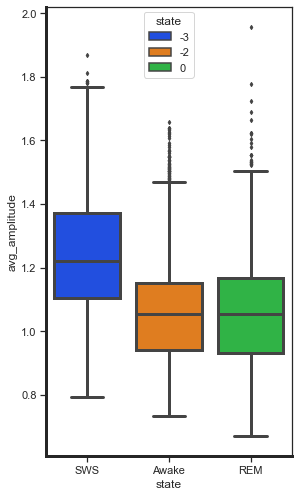

In [ ]:
x = df_avg_amplitude
sns.set(rc={'figure.figsize':(4.4,8.27)})
sns.set_style("ticks")
g=sns.boxplot(x="state", y="avg_amplitude",hue = 'state', palette= 'bright',dodge=False,fliersize=3,linewidth=3,data=x )
#g.set_yticklabels(g.get_yticks(), size = 14)
g.set_xticklabels(['SWS','Awake','REM'])
g.spines['left'].set_linewidth(3)
g.spines['bottom'].set_linewidth(3)
#plt.ylim(0,2)

if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/histogram_avg_fr/boxplot_firing_rate_all_mice.pdf', dpi=1200,) 

### Triplet type 1 

#### Frequency

In [ ]:
[data_dict.update({'normTototal_ActiveCells': (len(np.where(~np.isnan(data_dict["div_avg_firing_perSecond"]))[0]) / data_dict["nrTotalCells"]) * 100}) for data_dict in data_list if len(data_dict["div_avg_firing_perSecond"])];


In [ ]:
# plotting average firing rate in 3 levels

df_avg_firingRate_level = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 900 and x['epochDuration'] < 10000), data_list))

for i, indDict in enumerate(temp_list):
    df_avg_firingRate_level = df_avg_firingRate_level.append(pd.DataFrame({'1th':[np.nanmean(indDict['div_avg_firing_perSecond'][0])], 
                                                                           '2th':[np.nanmean(indDict['div_avg_firing_perSecond'][1])], 
                                                                           '3th':[np.nanmean(indDict['div_avg_firing_perSecond'][2])],
                                                                           'name':indDict['mouseName'], 
                                                                           'state': indDict['hypnoState'],
                                                                           'nrActiveCells':indDict['nrActiveCells'],
                                                                           'normTototal_ActiveCells':[indDict['normTototal_ActiveCells']],
                                                                           'epochID': i}), ignore_index = True)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# plotting average firing rate in 3 levels

df_avg_firingRate_level = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 900 and x['epochDuration'] < 10000), data_list))

for i, indDict in enumerate(temp_list):
    df_avg_firingRate_level = df_avg_firingRate_level.append(pd.DataFrame({'1th':[np.nanmean(indDict['div_avg_firing_perSecond'][0])], 
                                                                           '2th':[np.nanmean(indDict['div_avg_firing_perSecond'][1])], 
                                                                           '3th':[np.nanmean(indDict['div_avg_firing_perSecond'][2])],
                                                                           'name':indDict['mouseName'], 
                                                                           'state': indDict['hypnoState'],
                                                                           'epochID': i}), ignore_index = True)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
### number active cells per state####
df_temp = df_avg_firingRate_level.melt(id_vars=['name', 'state', 'epochID','nrActiveCells','normTototal_ActiveCells'], var_name='level', value_name='firing_rate')
df_temp
#if save_file:
 #   df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type1_fr/active_cells.csv')

name  state  epochID  nrActiveCells  normTototal_ActiveCells  \
0     250520_m18a      0        0            202               161.864407   
1     250520_m18a      0        1            174               135.169492   
2     250520_m18a     -2        2             86                50.423729   
3     250520_m18a      0        3            182               142.372881   
4     250520_m18a     -2        4            107                63.135593   
...           ...    ...      ...            ...                      ...   
3937  210121_m24a     -2     1309             86               101.398601   
3938  210121_m24a     -2     1310             70                74.125874   
3939  210121_m24a      0     1311             23                19.580420   
3940  210121_m24a     -2     1312             71                72.027972   
3941  210121_m24a      0     1313             17                13.286713   

     level  firing_rate  
0      1th     0.024869  
1      1th     0.026828  
2      1th     0.084547  
3      1th     0.029954  
4      1th     0.101071  
...    ...          ...  
3937   3th     0.022420  
3938   3th     0.032155  
3939   3th     0.059836  
3940   3th     0.030434  
3941   3th     0.117783  

[3942 rows x 7 columns]

In [ ]:
df_temp.groupby(["name", "state"]).agg(np.nanmedian)

epochID  nrActiveCells  normTototal_ActiveCells  \
name        state                                                    
030720_m20a -3       923.0          113.0                82.432432   
            -2       894.5          102.5                84.054054   
             0       862.0           59.0                45.405405   
050820_m21a -3       761.5           71.0                44.146341   
            -2       695.0          102.0                77.073171   
             0       668.0           66.0                48.048780   
110620_m18b -3       481.0          125.0                94.387755   
            -2       472.0          118.0                89.285714   
             0       464.0           88.0                65.816327   
210121_m24a -3      1269.5           43.0                34.265734   
            -2      1232.5           58.5                55.594406   
             0      1231.0           25.0                21.678322   
250520_m18a -3       140.5          141.0                84.110169   
            -2        98.0          138.0                81.779661   
             0        91.0          114.0                63.559322   
290520_m17a -3       331.0          176.0                82.993197   
            -2       305.5          133.0                60.714286   
             0       265.0          109.0                49.319728   
291020_m23a -3      1075.0           52.5                93.975904   
            -2      1067.0           32.5                52.409639   
             0      1061.0           22.0                35.542169   

                   firing_rate  
name        state               
030720_m20a -3        0.049811  
            -2        0.057002  
             0        0.072406  
050820_m21a -3        0.053681  
            -2        0.059435  
             0        0.069929  
110620_m18b -3        0.069464  
            -2        0.064247  
             0        0.058293  
210121_m24a -3        0.045779  
            -2        0.044881  
             0        0.090547  
250520_m18a -3        0.053466  
            -2        0.092770  
             0        0.063221  
290520_m17a -3        0.058693  
            -2        0.083628  
             0        0.059616  
291020_m23a -3        0.066368  
            -2        0.080312  
             0        0.066533

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


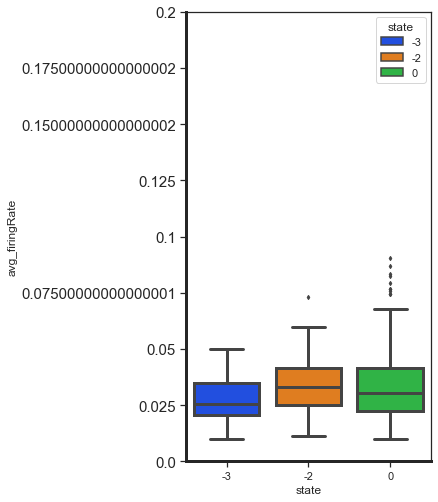

In [ ]:
x = df_avg_firingRate

sns.set(rc={'figure.figsize':(4.4,8.27)})
sns.set_style("ticks")
g=sns.boxplot(x="state", y="avg_firingRate",hue = 'state', palette= 'bright',dodge=False,fliersize=3,linewidth=3,data=df_avg_firingRate )
plt.ylim(0,0.2)
g.set_yticklabels(g.get_yticks(), size = 15)
#g.set_xticklabels(['SWS','Awake','REM'])
g.spines['left'].set_linewidth(3)
g.spines['bottom'].set_linewidth(3)
#g.spines['right'].set_linewidth(3)
#plt.ylim(0,0.4)
#if save_file:
 #   x.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type1_fr/Type1_fr_all_cells.csv')
#if save_fig:
  #   plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type1_fr/Type1_fr_all_cells.pdf', dpi=600,) 

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


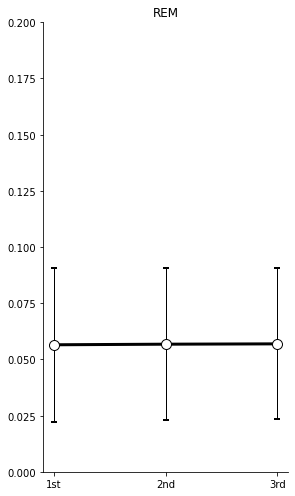

In [ ]:
df_temp = pd.DataFrame()
df_temp = df_avg_firingRate_level.melt(id_vars=['name', 'state', 'epochID'], var_name='level', value_name='firing_rate')
x = df_temp[df_temp.state == -3]
x = x[x['firing_rate'].notna()]
x_stats = x.groupby(['level']).describe()
j = x_stats.index
medians = x_stats[('firing_rate', '50%')]
upper=x_stats [('firing_rate', '75%')]
lower=x_stats [('firing_rate', '25%')]
error=upper-lower
fig, ax = plt.subplots(figsize=(4.4,8.27))
ax.errorbar(j, medians, error, color='black', ecolor='black',elinewidth= 1,capsize=3,capthick=2, marker='o',markersize=10,markerfacecolor='white',linewidth=3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('REM')
ax.set_xticklabels(['1st','2nd','3rd'])


ax=plt.ylim(0,0.2)
if save_fig:
     plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type1_fr/Type1_fr_divided_thirds_rem_all_cells.pdf', dpi=600,) 

In [ ]:
df_temp = df_avg_firingRate_level.melt(id_vars=['name', 'state', 'epochID'], var_name='Levels', value_name='firing_rate')
df_temp

name  state  epochID Levels  firing_rate
0     250520_m18a      0        0    1th     0.024869
1     250520_m18a      0        1    1th     0.026828
2     250520_m18a     -2        2    1th     0.084547
3     250520_m18a      0        3    1th     0.029954
4     250520_m18a     -2        4    1th     0.101071
...           ...    ...      ...    ...          ...
3937  210121_m24a     -2     1309    3th     0.022420
3938  210121_m24a     -2     1310    3th     0.032155
3939  210121_m24a      0     1311    3th     0.059836
3940  210121_m24a     -2     1312    3th     0.030434
3941  210121_m24a      0     1313    3th     0.117783

[3942 rows x 5 columns]

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


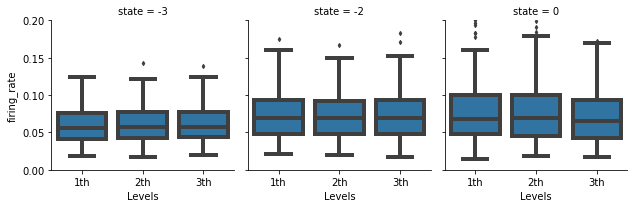

In [ ]:
df_temp = pd.DataFrame()
df_temp = df_avg_firingRate_level.melt(id_vars=['name', 'state', 'epochID'], var_name='Levels', value_name='firing_rate')
myGrid = sns.FacetGrid(data=df_temp, col='state', col_wrap=3, aspect=1, ylim=[0, 0.2])
myplot = myGrid.map(sns.boxplot, 'Levels', 'firing_rate' ,fliersize=3,linewidth=4)
if save_file:
    df_avg_firingRate_level.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type1_fr/all_cells/Type1_fr_boxplot_all_cells_with_levels.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type1_fr/all_cells/Type1_fr_boxplot_all_cells_with_levels.pdf', dpi=600, format='pdf')

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the violinplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


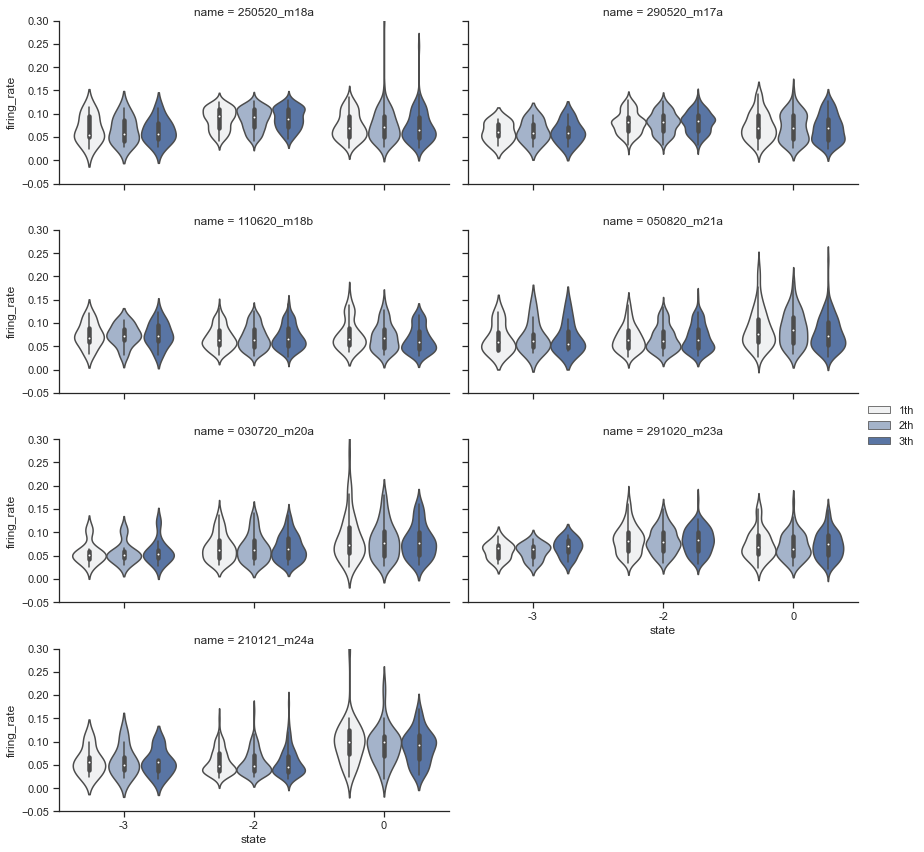

In [ ]:

df_temp = pd.DataFrame()
df_temp = df_avg_firingRate_level.melt(id_vars=['name', 'state', 'epochID'], var_name='level', value_name='firing_rate')

myGrid = sns.FacetGrid(data=df_temp, col='name', col_wrap=2, aspect=2, ylim=[-.05, 0.6])
myplot = myGrid.map(sns.violinplot, 'state', 'firing_rate', 'level')
myplot.add_legend()
#sns.violinplot(data=df_temp, y = 'firing_rate', x = 'variable', hue='state', groupby= 'name')
plt.ylim([-.05, 0.3])
if save_file:
    df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type1_fr/Triplet_type1_fr.csv')
#if save_fig:
 #   plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type1_fr/Triplet_type1_fr.pdf', dpi=300, format='pdf')

In [ ]:
df_temp.shape

(743217, 5)

#### Frequency based on top x%

In [ ]:
# plotting average firing rate in 3 levels

df_avg_firingRate_level = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 900 and x['epochDuration'] < 10000), data_list))

for i, indDict in enumerate(temp_list):
    df_avg_firingRate_level = df_avg_firingRate_level.append(pd.DataFrame({'1th':[np.nanmean(indDict['div_avg_firing_perSecond'][0][indDict['top20_avg_firing'][0]])], 
                                                                           '2th':[np.nanmean(indDict['div_avg_firing_perSecond'][1][indDict['top20_avg_firing'][0]])], 
                                                                           '3th':[np.nanmean(indDict['div_avg_firing_perSecond'][2][indDict['top20_avg_firing'][0]])],
                                                                           'name':indDict['mouseName'], 
                                                                           'state': indDict['hypnoState'], 
                                                                           'epochID': i}), ignore_index = True)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


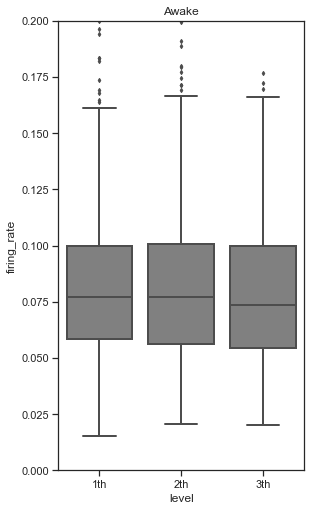

In [ ]:
df_temp = pd.DataFrame()
df_temp = df_avg_firingRate_level.melt(id_vars=['name', 'state', 'epochID'], var_name='level', value_name='firing_rate')
x = df_temp[df_temp.state == 0]
sns.set(rc={'figure.figsize':(4.4,8.27)})
sns.set_style("ticks")
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,5))
#sns.lineplot(data=x, x="level", y="firing_rate", style="state",color='blue',markers=True,legend = False)
#sns.barplot(data=x, x="level", y="firing_rate", ci=95)
#ax = sns.barplot(data=x, x="level", y="firing_rate", color="Grey")
ax=sns.boxplot(x="level", y="firing_rate",dodge=False,fliersize=3,color='grey',linewidth=2,data=x )
ax.set_ylim([0,0.2])
ax.set_title('Awake')
if save_fig:
     plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type1_fr/Type1_fr_divided_thirds_box_plot_awake_top_active_all_cells.pdf', dpi=600,) 


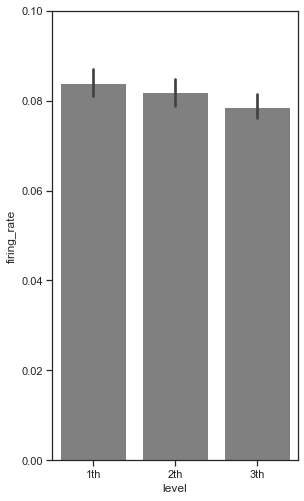

In [ ]:
df_temp = pd.DataFrame()
df_temp = df_avg_firingRate_level.melt(id_vars=['name', 'state', 'epochID'], var_name='level', value_name='firing_rate')
x = df_temp[df_temp.state == 0]
sns.set(rc={'figure.figsize':(4.4,8.27)})
sns.set_style("ticks")
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,5))
#sns.lineplot(data=x, x="level", y="firing_rate", style="state",color='blue',markers=True,legend = False)
#sns.barplot(data=x, x="level", y="firing_rate", ci=95)
ax = sns.barplot(data=x, x="level", y="firing_rate", color="Grey")
ax.set_ylim([0,0.1])
if save_fig:
     plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type1_fr/Type1_fr_divided_thirds_bar_plot_awake_top_active_all_cells.pdf', dpi=600,) 


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


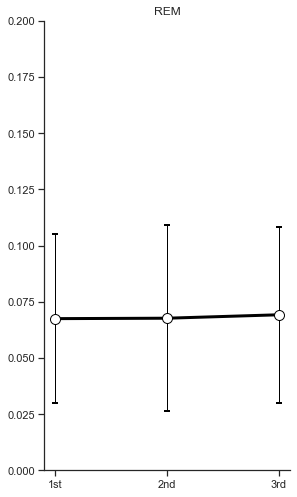

In [ ]:
df_temp = pd.DataFrame()
df_temp = df_avg_firingRate_level.melt(id_vars=['name', 'state', 'epochID'], var_name='level', value_name='firing_rate')
x = df_temp[df_temp.state == -3]
x = x[x['firing_rate'].notna()]
x_stats = x.groupby(['level']).describe()
j = x_stats.index
medians = x_stats[('firing_rate', '50%')]
upper=x_stats [('firing_rate', '75%')]
lower=x_stats [('firing_rate', '25%')]
error=upper-lower
fig, ax = plt.subplots(figsize=(4.4,8.27))
ax.errorbar(j, medians, error, color='black', ecolor='black',elinewidth= 1,capsize=3,capthick=2, marker='o',markersize=10,markerfacecolor='white',linewidth=3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('REM')
ax.set_xticklabels(['1st','2nd','3rd'])
plt.ylim(0,0.2)
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type1_fr/Type1_fr_divided_thirds_top_active_cells_rem_all_cells.pdf', dpi=300,) 

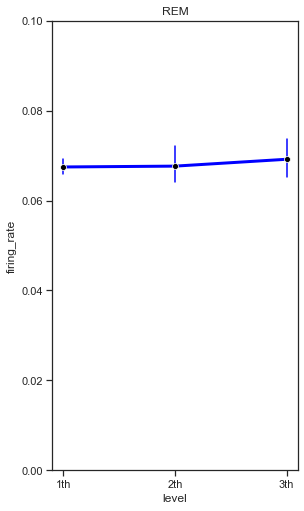

In [ ]:
###choose pattern to plot####
df_temp = pd.DataFrame()
df_temp = df_avg_firingRate_level.melt(id_vars=['name', 'state', 'epochID'], var_name='level', value_name='firing_rate')
x = df_temp[df_temp.state == -3]
x = x[x['firing_rate'].notna()]
#sns.set(rc={'figure.figsize':(4.4,8.27)})
sns.set(rc={'figure.figsize':(4.4,8.27)})

sns.set_style("ticks")
#ax = sns.violinplot(data=x, x="level", y="firing_rate", hue='state',ci=95,estimator=np.mean)
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,5))
g=sns.lineplot(data=x,x="level", y="firing_rate",marker='o',markerfacecolor='black',color='blue',err_style='bars',estimator=np.median, ci= 65,legend = False, linewidth=3 )
g.set_title('REM')
#ax = sns.pointplot(data=df_temp, x="level", y="firing_rate", hue = 'state',errwidth=1, ci=68, estimator=np.mean)
#ax.set_ylim([0,0.1])
plt.ylim(0,0.1)

if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type1_fr/Type1_fr_divided_thirds_top_active_cells_rem_all_cells.pdf', dpi=300,) 

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the violinplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


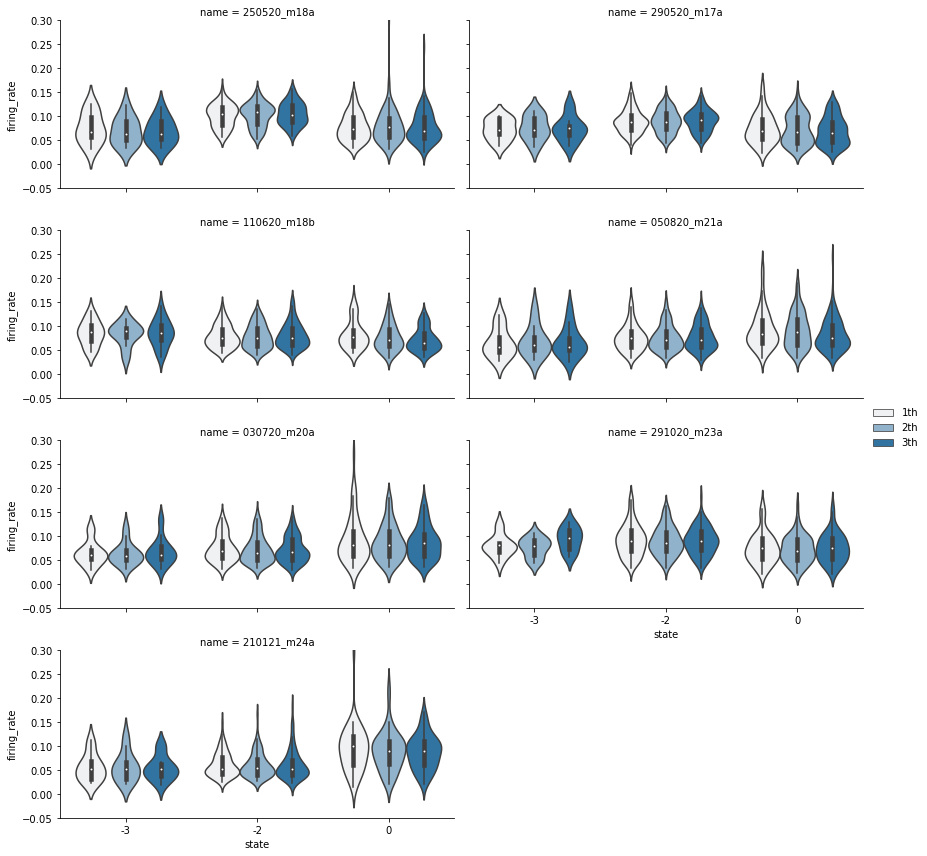

In [ ]:
df_temp = pd.DataFrame()
df_temp = df_avg_firingRate_level.melt(id_vars=['name', 'state', 'epochID'], var_name='level', value_name='firing_rate')

myGrid = sns.FacetGrid(data=df_temp, col='name', col_wrap=2, aspect=2, ylim=[-.05, 0.6])
myplot = myGrid.map(sns.violinplot, 'state', 'firing_rate', 'level')
myplot.add_legend()
plt.ylim([-.05, 0.3])
if save_file:
    df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type1_fr/Triplet_type1_fr_based_on_top_20%.csv')
#sns.violinplot(data=df_temp, y = 'firing_rate', x = 'variable', hue='state', groupby= 'name')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type1_fr/Triplet_type1_fr_based_on_top_20%.pdf', dpi=300, format='pdf')

In [ ]:
df_temp.shape

(145032, 5)

#### Frequency based on least x%

In [ ]:
# plotting average firing rate in 3 levels

df_avg_firingRate_level = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 900 and x['epochDuration'] < 10000), data_list))

for i, indDict in enumerate(temp_list):
    df_avg_firingRate_level = df_avg_firingRate_level.append(pd.DataFrame({'1th':[np.nanmean(indDict['div_avg_firing_perSecond'][0][indDict['least20_avg_firing'][0]])], 
                                                                           '2th':[np.nanmean(indDict['div_avg_firing_perSecond'][1][indDict['least20_avg_firing'][0]])], 
                                                                           '3th':[np.nanmean(indDict['div_avg_firing_perSecond'][2][indDict['least20_avg_firing'][0]])],
                                                                           'name':indDict['mouseName'], 
                                                                           'state': indDict['hypnoState'], 
                                                                           'epochID': i}), ignore_index = True)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
df_temp = pd.DataFrame()
df_temp = df_avg_firingRate_level.melt(id_vars=['name', 'state', 'epochID'], var_name='level', value_name='firing_rate')
x = df_temp[df_temp.state == 0]
sns.set(rc={'figure.figsize':(4.4,8.27)})
sns.set_style("ticks")
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,5))
#sns.lineplot(data=x, x="level", y="firing_rate", style="state",color='blue',markers=True,legend = False)
#sns.barplot(data=x, x="level", y="firing_rate", ci=95)
#ax = sns.barplot(data=x, x="level", y="firing_rate", color="Grey")
ax=sns.boxplot(x="level", y="firing_rate",dodge=False,fliersize=3,color='grey',linewidth=2,data=x )
ax.set_ylim([0,0.2])
ax.set_title('Awake')
if save_fig:
     plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type1_fr/Type1_fr_divided_thirds_box_plot_awake_least_active_all_cells.pdf', dpi=600,) 


NameError: name 'df_avg_firingRate_level' is not defined

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


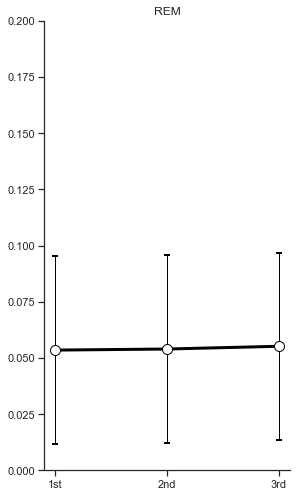

In [ ]:
df_temp = pd.DataFrame()
df_temp = df_avg_firingRate_level.melt(id_vars=['name', 'state', 'epochID'], var_name='level', value_name='firing_rate')
x = df_temp[df_temp.state == -2]
x = x[x['firing_rate'].notna()]
x_stats = x.groupby(['level']).describe()
j = x_stats.index
medians = x_stats[('firing_rate', '50%')]
upper=x_stats [('firing_rate', '75%')]
lower=x_stats [('firing_rate', '25%')]
error=upper-lower
fig, ax = plt.subplots(figsize=(4.4,8.27))
ax.errorbar(j, medians, error, color='black', ecolor='black',elinewidth= 1,capsize=3,capthick=2, marker='o',markersize=10,markerfacecolor='white',linewidth=3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('REM')
ax.set_xticklabels(['1st','2nd','3rd'])
plt.ylim(0,0.2)
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type1_fr/Type1_fr_divided_thirds_least20_active_cells_rem_all_cells.pdf', dpi=300,)  

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the violinplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


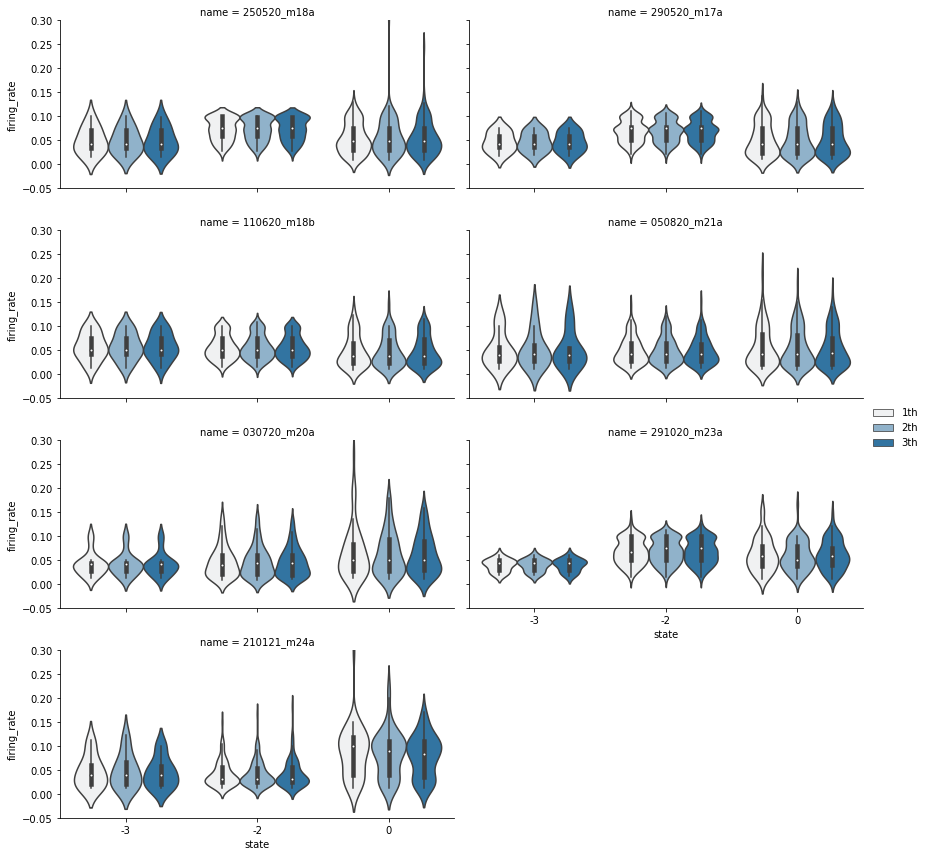

In [ ]:
df_temp = pd.DataFrame()
df_temp = df_avg_firingRate_level.melt(id_vars=['name', 'state', 'epochID'], var_name='level', value_name='firing_rate')

myGrid = sns.FacetGrid(data=df_temp, col='name', col_wrap=2, aspect=2, ylim=[-.05, 0.6])
myplot = myGrid.map(sns.violinplot, 'state', 'firing_rate', 'level')
myplot.add_legend()
plt.ylim([-.05, 0.3])
if save_file:
    df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type1_fr/Triplet_type1_fr_based_on_least_20%.csv')
#sns.violinplot(data=df_temp, y = 'firing_rate', x = 'variable', hue='state', groupby= 'name')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type1_fr/Triplet_type1_fr_based_on_least_20%.pdf', dpi=300, format='pdf')

In [ ]:
df_temp.shape

(3783, 5)

#### Frequency based on top x% of amplitude

In [ ]:
# plotting average firing rate in 3 levels

df_avg_firingRate_level = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 900 and x['epochDuration'] < 10000), data_list))

for i, indDict in enumerate(temp_list):
    df_avg_firingRate_level = df_avg_firingRate_level.append(pd.DataFrame({'1th':[np.nanmean(indDict['div_avg_firing_perSecond'][0][indDict['top20_amplitude'][0]])], 
                                                                           '2th':[np.nanmean(indDict['div_avg_firing_perSecond'][1][indDict['top20_amplitude'][0]])], 
                                                                           '3th':[np.nanmean(indDict['div_avg_firing_perSecond'][2][indDict['top20_amplitude'][0]])],
                                                                           'name':indDict['mouseName'], 
                                                                           'state': indDict['hypnoState'], 
                                                                           'epochID': i}), ignore_index = True)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the violinplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


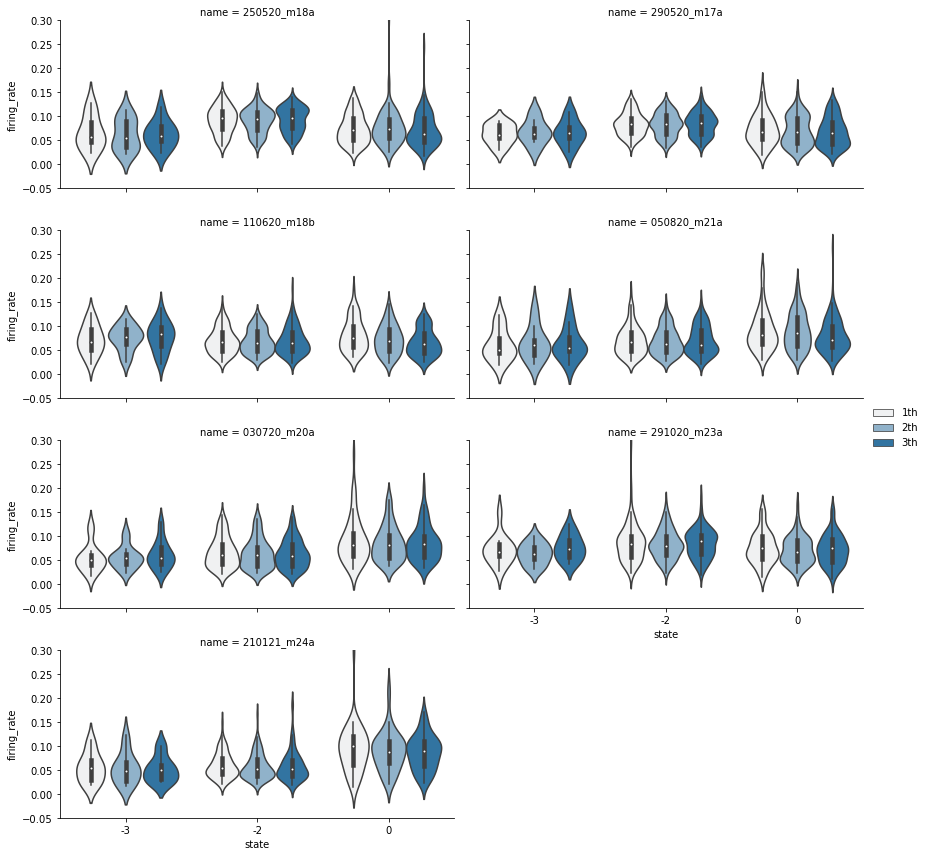

In [ ]:
df_temp = pd.DataFrame()
df_temp = df_avg_firingRate_level.melt(id_vars=['name', 'state', 'epochID'], var_name='level', value_name='firing_rate')

myGrid = sns.FacetGrid(data=df_temp, col='name', col_wrap=2, aspect=2, ylim=[-.05, 0.6])
myplot = myGrid.map(sns.violinplot, 'state', 'firing_rate', 'level')
myplot.add_legend()
plt.ylim([-.05, 0.3])
if save_file:
    df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type1_fr/Triplet_type1_fr_based_on_top_20%_amp.csv')
#sns.violinplot(data=df_temp, y = 'firing_rate', x = 'variable', hue='state', groupby= 'name')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type1_fr/Triplet_type1_fr_based_on_top_20%_amp.pdf', dpi=300, format='pdf')

In [ ]:
df_temp.shape

(145032, 5)

#### Frequency based on least x% of amplitude

In [ ]:
# plotting average firing rate in 3 levels

df_avg_firingRate_level = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 900 and x['epochDuration'] < 10000), data_list))

for i, indDict in enumerate(temp_list):
    df_avg_firingRate_level = df_avg_firingRate_level.append(pd.DataFrame({'1th':[np.nanmean(indDict['div_avg_firing_perSecond'][0][indDict['least20_amplitude'][0]])], 
                                                                           '2th':[np.nanmean(indDict['div_avg_firing_perSecond'][1][indDict['least20_amplitude'][0]])], 
                                                                           '3th':[np.nanmean(indDict['div_avg_firing_perSecond'][2][indDict['least20_amplitude'][0]])],
                                                                           'name':indDict['mouseName'], 
                                                                           'state': indDict['hypnoState'], 
                                                                           'epochID': i}), ignore_index = True)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the violinplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


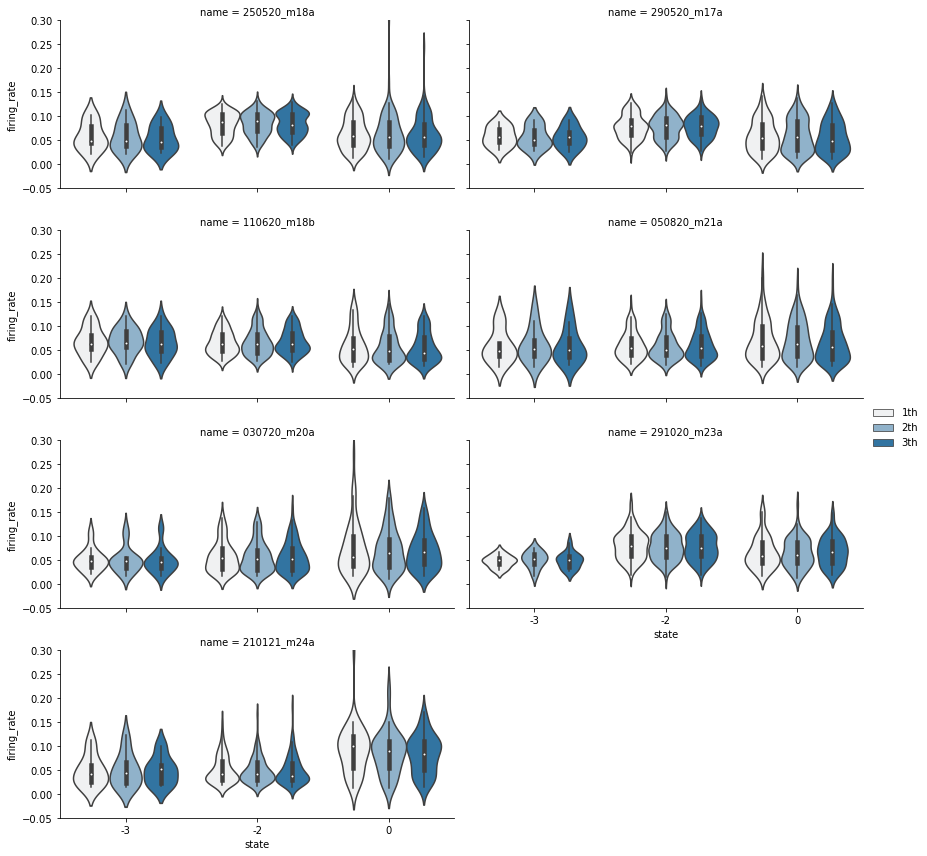

In [ ]:
df_temp = pd.DataFrame()
df_temp = df_avg_firingRate_level.melt(id_vars=['name', 'state', 'epochID'], var_name='level', value_name='firing_rate')

myGrid = sns.FacetGrid(data=df_temp, col='name', col_wrap=2, aspect=2, ylim=[-.05, 0.6])
myplot = myGrid.map(sns.violinplot, 'state', 'firing_rate', 'level')
myplot.add_legend()
plt.ylim([-.05, 0.3])
if save_file:
    df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type1_fr/Triplet_type1_fr_based_on_least_20%_amp.csv')
#sns.violinplot(data=df_temp, y = 'firing_rate', x = 'variable', hue='state', groupby= 'name')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type1_fr/Triplet_type1_fr_based_on_least_20%_amp.pdf', dpi=300, format='pdf')

In [ ]:
df_temp.shape

(145032, 5)

#### Amplitude

In [ ]:
# plotting average firing rate in 3 levels

df_avg_amplitude_level = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 930 and x['epochDuration'] < 10000), data_list))

for i, indDict in enumerate(temp_list):
    df_avg_amplitude_level = df_avg_amplitude_level.append(pd.DataFrame({'1th':[np.nanmean(indDict['div_avg_amplitude'][0])], 
                                                                         '2th':[np.nanmean(indDict['div_avg_amplitude'][1])], 
                                                                         '3th':[np.nanmean(indDict['div_avg_amplitude'][2])],
                                                                         'name':indDict['mouseName'], 
                                                                         'state': indDict['hypnoState'], 
                                                                         'epochID': i}), ignore_index = True)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


[Text(0, 0, '1st'), Text(1, 0, '2nd'), Text(2, 0, '3rd')]

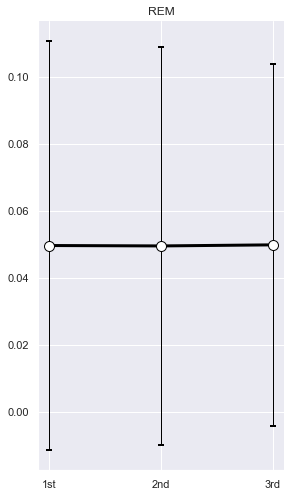

In [ ]:
df_temp = pd.DataFrame()
df_temp = df_avg_firingRate_level.melt(id_vars=['name', 'state', 'epochID'], var_name='level', value_name='amplitude')
x = df_temp[df_temp.state == 0]
x = x[x['amplitude'].notna()]
x_stats = x.groupby(['level']).describe()
j = x_stats.index
medians = x_stats[('amplitude', '50%')]
upper=x_stats [('amplitude', '75%')]
lower=x_stats [('amplitude', '25%')]
error=upper-lower
fig, ax = plt.subplots(figsize=(4.4,8.27))
ax.errorbar(j, medians, error, color='black', ecolor='black',elinewidth= 1,capsize=3,capthick=2, marker='o',markersize=10,markerfacecolor='white',linewidth=3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('REM')
ax.set_xticklabels(['1st','2nd','3rd'])


#ax=plt.ylim(0,0.2)
#if save_fig:
 #    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type1_fr/Type1_fr_divided_thirds_rem_all_cells.pdf', dpi=600,) 

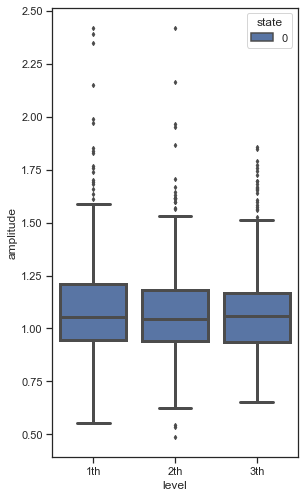

In [ ]:
df_temp = pd.DataFrame()
df_temp = df_avg_amplitude_level.melt(id_vars=['name', 'state', 'epochID'], var_name='level', value_name='amplitude')
x = df_temp
x = df_temp[df_temp.state == 0]
x = x[x['amplitude'].notna()]
sns.set(rc={'figure.figsize':(4.4,8.27)})
sns.set_style("ticks")
g=sns.boxplot(x="level", y="amplitude",hue="state",dodge=False,fliersize=3,linewidth=3,data=x )
#g.set_xticklabels(['REM','SWS','Awake'])


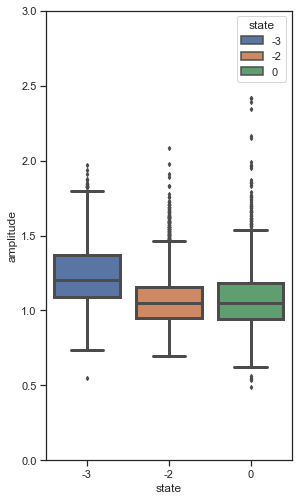

In [ ]:
df_temp = pd.DataFrame()
df_temp = df_avg_amplitude_level.melt(id_vars=['name', 'state', 'epochID'], var_name='level', value_name='amplitude')
x = df_temp
sns.set(rc={'figure.figsize':(4.4,8.27)})
sns.set_style("ticks")
g=sns.boxplot(x="state", y="amplitude",hue="state",dodge=False,fliersize=3,linewidth=3,data=x )
#g.set_xticklabels(['REM','SWS','Awake'])

plt.ylim(0,3)
#sns.catplot(x="Pattern", y="firing_rate", hue= "subEpoch",kind="point",height=6, aspect=.75,data=x)
#g=sns.PairGrid(x,y_vars="firing_rate",x_vars=["SWSn", "REM", "SWSn+1", ],
             #height=5, aspect=.5)
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type1_amp/Type1_amp_box_plot_all_cells.pdf', dpi=300, format='pdf')

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the violinplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


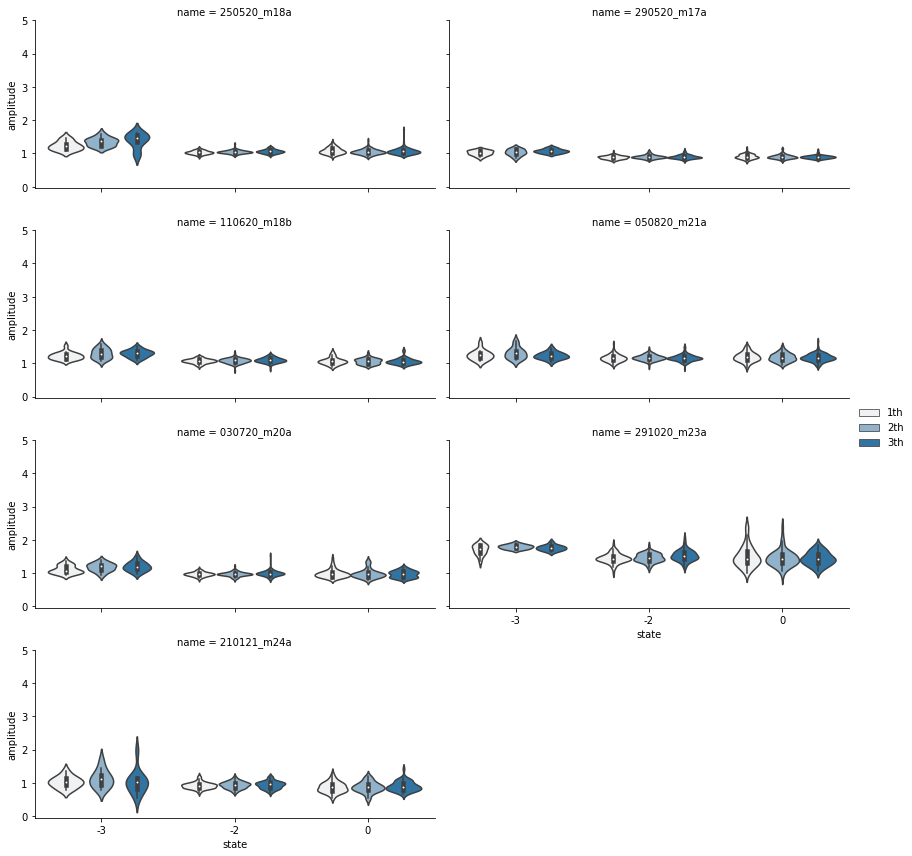

In [ ]:
df_temp = pd.DataFrame()
df_temp = df_avg_amplitude_level.melt(id_vars=['name', 'state', 'epochID'], var_name='level', value_name='amplitude')

myGrid = sns.FacetGrid(data=df_temp, col='name', col_wrap=2, aspect=2, ylim=[-.05, 6])
myplot = myGrid.map(sns.violinplot, 'state', 'amplitude', 'level')
myplot.add_legend()
plt.ylim([-.05, 5])
if save_file:
    df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type1_amp/Triplet_type1_amp.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type1_amp/Triplet_type1_amp.pdf', dpi=300, format='pdf')

In [ ]:
# average firing rate for epoch duration between 30 sec to 5 min

df_avg_amplitude = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 930 and x['epochDuration'] < 10000), data_list))

for i, indDict in enumerate(temp_list):
    df_avg_amplitude = df_avg_amplitude.append(pd.DataFrame({'avg_amplitude':[np.nanmean(indDict['avg_amplitude'])], 
                                                             'name':indDict['mouseName'], 
                                                             'state': indDict['hypnoState'], 
                                                             'epochID': i}), ignore_index = True)
if save_file:
    df_avg_amplitude.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/violin_plot_avg_amp/average_amp.csv')


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


#### Amplitude based on top x%

In [ ]:
df_avg_amplitude_level = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 930 and x['epochDuration'] < 10000), data_list))

for i, indDict in enumerate(temp_list):
    df_avg_amplitude_level = df_avg_amplitude_level.append(pd.DataFrame({'1th':[np.nanmean(indDict['div_avg_amplitude'][0][indDict['top20_amplitude'][0]])], 
                                                                         '2th':[np.nanmean(indDict['div_avg_amplitude'][1][indDict['top20_amplitude'][0]])], 
                                                                         '3th':[np.nanmean(indDict['div_avg_amplitude'][2][indDict['top20_amplitude'][0]])],
                                                                         'name':indDict['mouseName'], 
                                                                         'state': indDict['hypnoState'], 
                                                                         'epochID': i}), ignore_index = True)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the violinplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


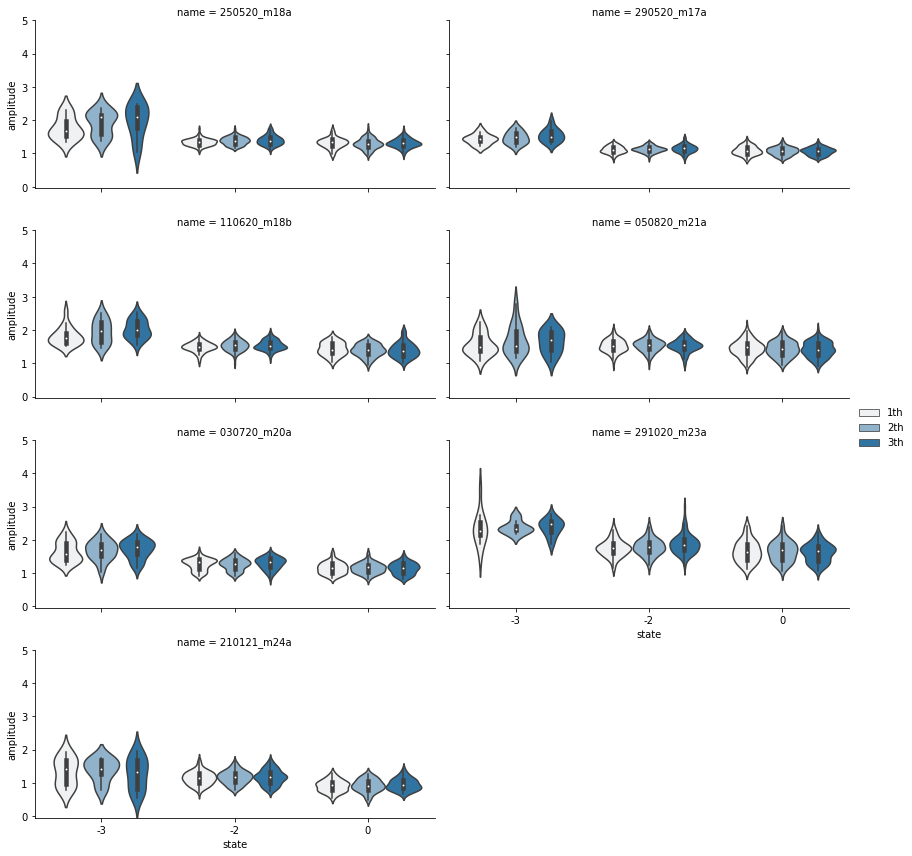

In [ ]:
df_temp = pd.DataFrame()
df_temp = df_avg_amplitude_level.melt(id_vars=['name', 'state', 'epochID'], var_name='level', value_name='amplitude')

myGrid = sns.FacetGrid(data=df_temp, col='name', col_wrap=2, aspect=2, ylim=[-.05, 6])
myplot = myGrid.map(sns.violinplot, 'state', 'amplitude', 'level')
myplot.add_legend()
plt.ylim([-.05, 5])
if save_file:
    df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type1_amp/Triplet_type1_amp_based_on_top_20%.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type1_amp/Triplet_type1_amp_based_on_top_20%.pdf', dpi=300, format='pdf')

In [ ]:
df_temp.shape

(145032, 5)

#### Amplitude based on least x%

In [ ]:
df_avg_amplitude_level = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 930 and x['epochDuration'] < 10000), data_list))

for i, indDict in enumerate(temp_list):
    df_avg_amplitude_level = df_avg_amplitude_level.append(pd.DataFrame({'1th':[np.nanmean(indDict['div_avg_amplitude'][0][indDict['least20_amplitude'][0]])], 
                                                                         '2th':[np.nanmean(indDict['div_avg_amplitude'][1][indDict['least20_amplitude'][0]])], 
                                                                         '3th':[np.nanmean(indDict['div_avg_amplitude'][2][indDict['least20_amplitude'][0]])],
                                                                         'name':indDict['mouseName'], 
                                                                         'state': indDict['hypnoState'], 
                                                                         'epochID': i}), ignore_index = True)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the violinplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


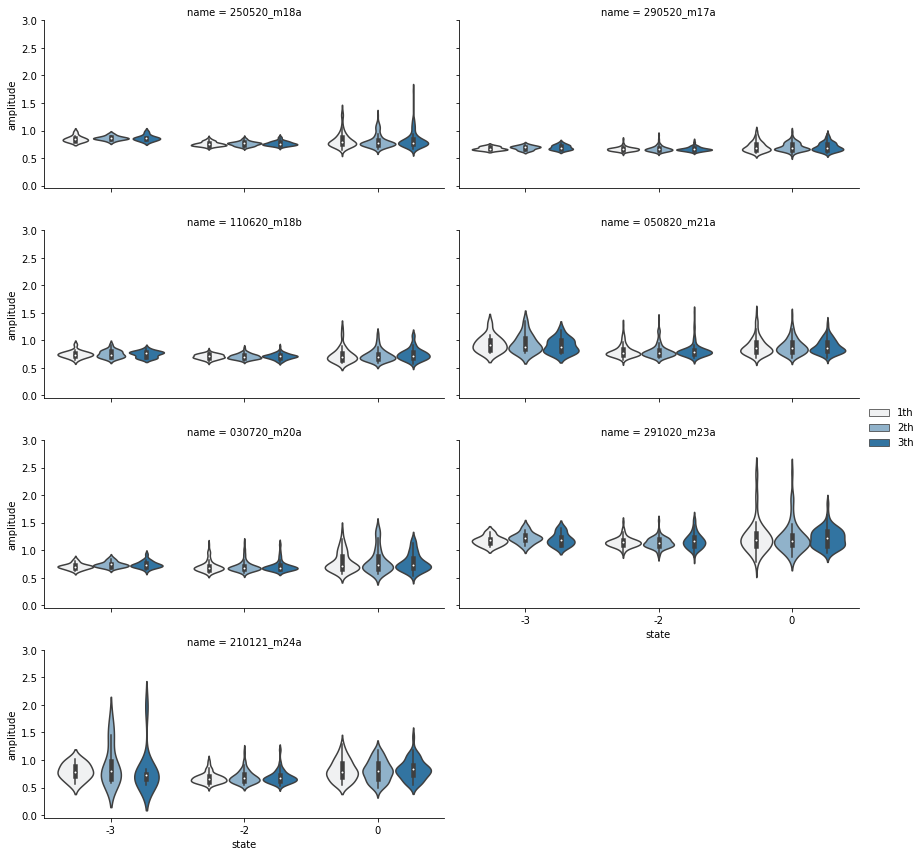

In [ ]:
df_temp = pd.DataFrame()
df_temp = df_avg_amplitude_level.melt(id_vars=['name', 'state', 'epochID'], var_name='level', value_name='amplitude')

myGrid = sns.FacetGrid(data=df_temp, col='name', col_wrap=2, aspect=2, ylim=[-.05, 6])
myplot = myGrid.map(sns.violinplot, 'state', 'amplitude', 'level')
myplot.add_legend()
plt.ylim([-.05, 3])
if save_file:
    df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type1_amp/Triplet_type1_amp_based_on_least_20%.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type1_amp/Triplet_type1_amp_based_on_least_20%.pdf', dpi=300, format='pdf')

#### Amplitude based on top x% of firing rate

In [ ]:
df_avg_amplitude_level = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 930 and x['epochDuration'] < 10000), data_list))

for i, indDict in enumerate(temp_list):
    df_avg_amplitude_level = df_avg_amplitude_level.append(pd.DataFrame({'1th':[np.nanmean(indDict['div_avg_amplitude'][0][indDict['top20_avg_firing'][0]])], 
                                                                         '2th':[np.nanmean(indDict['div_avg_amplitude'][1][indDict['top20_avg_firing'][0]])], 
                                                                         '3th':[np.nanmean(indDict['div_avg_amplitude'][2][indDict['top20_avg_firing'][0]])],
                                                                         'name':indDict['mouseName'], 
                                                                         'state': indDict['hypnoState'], 
                                                                         'epochID': i}), ignore_index = True)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the violinplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


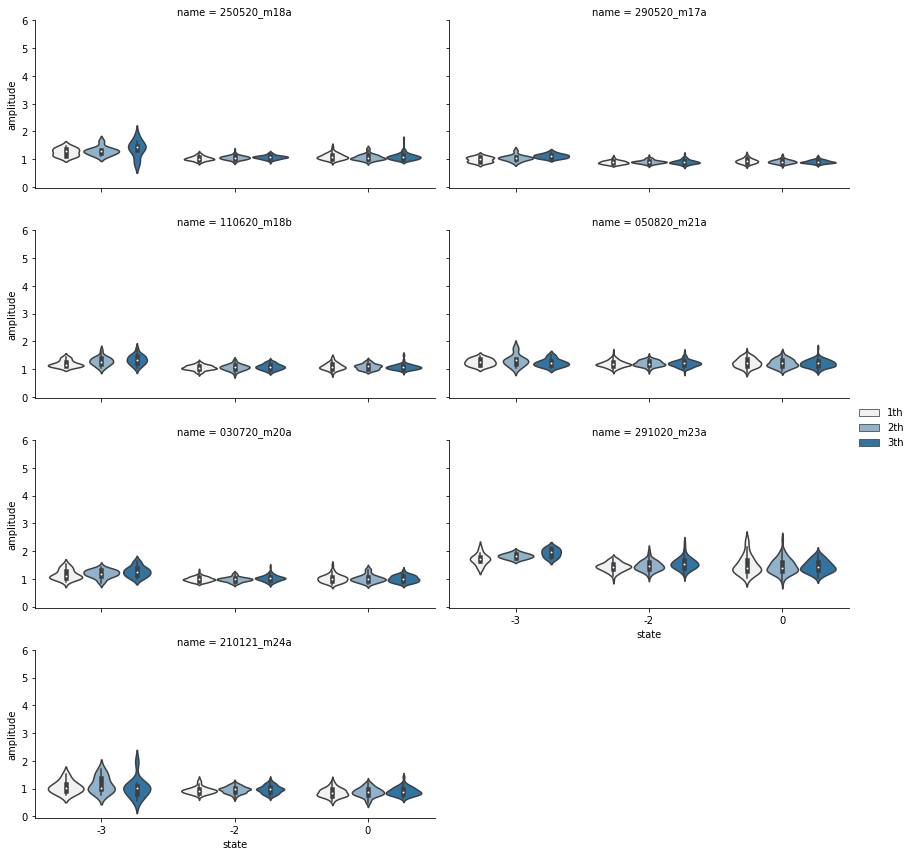

In [ ]:
df_temp = pd.DataFrame()
df_temp = df_avg_amplitude_level.melt(id_vars=['name', 'state', 'epochID'], var_name='level', value_name='amplitude')

myGrid = sns.FacetGrid(data=df_temp, col='name', col_wrap=2, aspect=2, ylim=[-.05, 6])
myplot = myGrid.map(sns.violinplot, 'state', 'amplitude', 'level')
myplot.add_legend()
if save_file:
    df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type1_amp/Triplet_type1_amp_based_on_top_fr_20%.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type1_amp/Triplet_type1_amp_based_on_top_fr_20%.pdf', dpi=300, format='pdf')

#### Amplitude based on least x% of firing rate

In [ ]:
df_avg_amplitude_level = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 930 and x['epochDuration'] < 10000), data_list))

for i, indDict in enumerate(temp_list):
    df_avg_amplitude_level = df_avg_amplitude_level.append(pd.DataFrame({'1th':[np.nanmean(indDict['div_avg_amplitude'][0][indDict['least20_avg_firing'][0]])], 
                                                                         '2th':[np.nanmean(indDict['div_avg_amplitude'][1][indDict['least20_avg_firing'][0]])], 
                                                                         '3th':[np.nanmean(indDict['div_avg_amplitude'][2][indDict['least20_avg_firing'][0]])],
                                                                         'name':indDict['mouseName'], 
                                                                         'state': indDict['hypnoState'], 
                                                                         'epochID': i}), ignore_index = True)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the violinplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


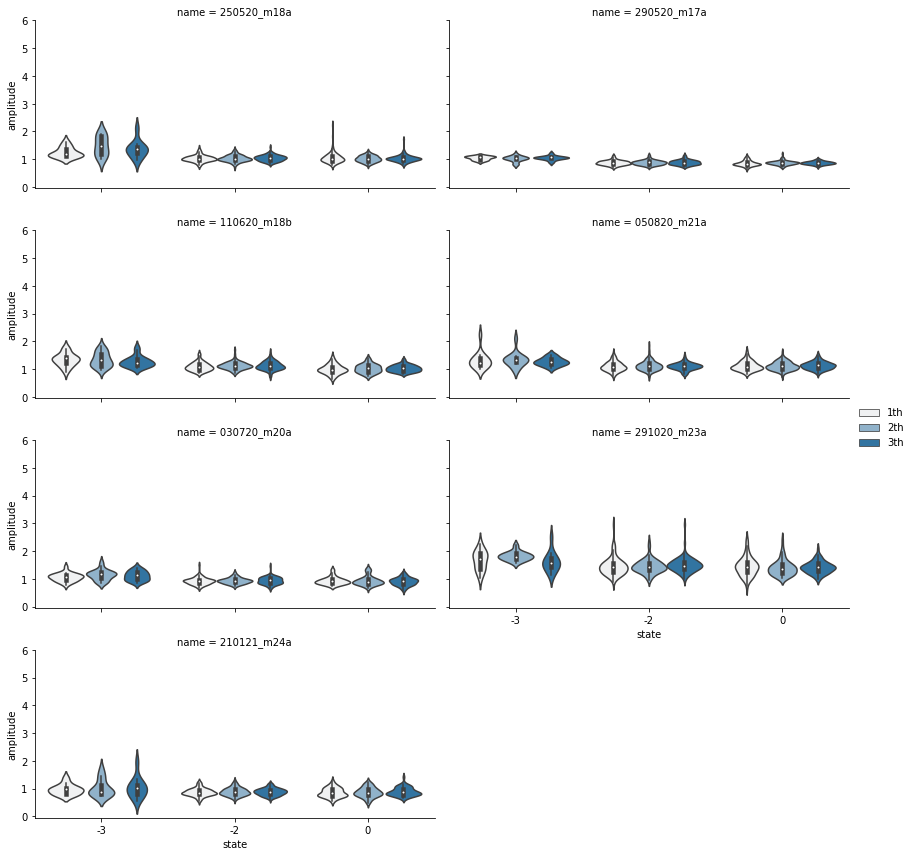

In [ ]:
df_temp = pd.DataFrame()
df_temp = df_avg_amplitude_level.melt(id_vars=['name', 'state', 'epochID'], var_name='level', value_name='amplitude')

myGrid = sns.FacetGrid(data=df_temp, col='name', col_wrap=2, aspect=2, ylim=[-.05, 6])
myplot = myGrid.map(sns.violinplot, 'state', 'amplitude', 'level')
myplot.add_legend()
if save_file:
    df_temp.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/Triplet_type1_amp/Triplet_type1_amp_based_on_least_fr_20%.csv')
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/Triplet_type1_amp/Triplet_type1_amp_based_on_least_fr_20%.pdf', dpi=300, format='pdf')

### Average firing rate 3th - 1th

#### Frquency

In [ ]:
# difference between first and third subepochs in firing rate

df_avg_firingRate_diff = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 900 and x['epochDuration'] < 10000), data_list))

for i, indDict in enumerate(temp_list):
    df_avg_firingRate_diff = df_avg_firingRate_diff.append(pd.DataFrame({'diff_avg_firingRate':np.nanmean(np.where(np.isnan(indDict['div_avg_firing_perSecond'][2]), 0, indDict['div_avg_firing_perSecond'][2]) - np.where(np.isnan(indDict['div_avg_firing_perSecond'][0]), 0, indDict['div_avg_firing_perSecond'][0])), 
                                                                         'name':indDict['mouseName'], 
                                                                         'state': indDict['hypnoState'], 
                                                                         'epochID': cellID(indices=np.arange(len(indDict['div_avg_firing_perSecond'][0])), 
                                                                                            mouse_name=indDict['mouseName'], 
                                                                                            all_mice_names=miceName)}), ignore_index = True)
    
print(f'Fraction of 0 values is: {round(100 * df_avg_firingRate_diff[df_avg_firingRate_diff.diff_avg_firingRate==0].shape[0] / df_avg_firingRate_diff.shape[0])}%')

Fraction of 0 values is: 0%


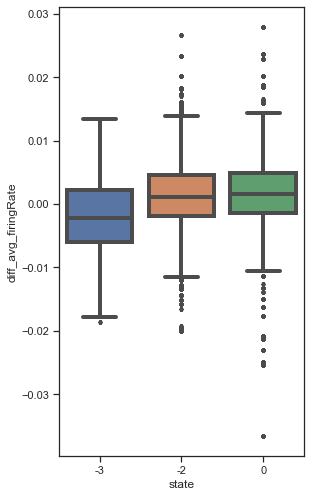

In [ ]:
df_temp = df_avg_firingRate_diff
#df_temp = df_avg_firingRate_diff.melt(id_vars=['name', 'epochID'], var_name='Pattern', value_name='firing_rate')

sns.set(rc={'figure.figsize':(4.4,8.27)})
sns.set_style("ticks")
#g=sns.boxplot(x="Pattern", y="FiringRate",dodge=False,fliersize=3, palette=['darkorange','blue'],linewidth=4,data=x )
g=sns.boxplot(x="state", y="diff_avg_firingRate",dodge=False,fliersize=3,linewidth=4,data=df_temp )

#g.set_xticklabels(['SWSn','Awake','SWSn.1'])
#plt.ylim(0,0.2)

In [ ]:
df_avg_firingRate_diff

diff_avg_firingRate         name  state  epochID
0                 -0.000739  250520_m18a      0     5000
1                 -0.000739  250520_m18a      0     5001
2                 -0.000739  250520_m18a      0     5002
3                 -0.000739  250520_m18a      0     5003
4                 -0.000739  250520_m18a      0     5004
...                     ...          ...    ...      ...
254648             0.006963  210121_m24a      0     4138
254649             0.006963  210121_m24a      0     4139
254650             0.006963  210121_m24a      0     4140
254651             0.006963  210121_m24a      0     4141
254652             0.006963  210121_m24a      0     4142

[254653 rows x 4 columns]

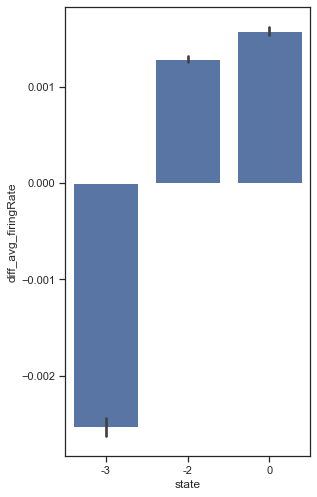

In [ ]:
x = df_avg_firingRate_diff.groupby(by = ["state"], as_index=False).agg(np.median)
#x = df_avg_firingRate_diff.groupby(by = ["state"])
#sns.set(rc={'figure.figsize':(4.4,8.27)})
#sns.set_style("ticks")
#plt.axhline(y=0,color='k')
g=sns.barplot(x="state", y="diff_avg_firingRate",color="b",data=df_avg_firingRate_diff)
#g.set_xticklabels(['REM','SWS','Awake'])
#if save_fig:
    #plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/avg_fr_3th_1st/Mean_fr_diff_all_cells.pdf', dpi=300, format='pdf')

In [ ]:
df_avg_firingRate_diff[1000:2000]

diff_avg_firingRate         name  state  epochID
0              -0.000739  250520_m18a      0     5000
1              -0.000739  250520_m18a      0     5001
2              -0.000739  250520_m18a      0     5002
3              -0.000739  250520_m18a      0     5003
4              -0.000739  250520_m18a      0     5004
..                   ...          ...    ...      ...
995             0.005710  250520_m18a     -2     5051
996             0.005710  250520_m18a     -2     5052
997             0.005710  250520_m18a     -2     5053
998             0.005710  250520_m18a     -2     5054
999             0.005710  250520_m18a     -2     5055

[1000 rows x 4 columns]

In [ ]:
x=df_avg_firingRate_diff[df_avg_firingRate_diff.diff_avg_firingRate!=0]

Text(0.5, 1.0, '3th - 1th')

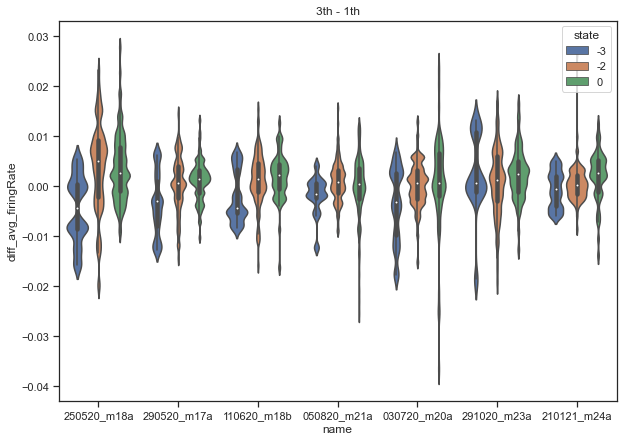

In [ ]:
plt.figure(figsize=(10,7))

# plotting after removing zeros
sns.violinplot(data=df_avg_firingRate_diff[df_avg_firingRate_diff.diff_avg_firingRate!=0],
               y='diff_avg_firingRate', x = 'name', hue='state')
#sns.stripplot(data=df_avg_firingRate_diff[df_avg_firingRate_diff.diff_avg_firingRate!=0], 
#              y='diff_avg_firingRate', x = 'name', hue='state', dodge=1, size = 1)
#plt.ylim([-.6, .6])
plt.title('3th - 1th')
#if save_file:
 #   df_avg_firingRate_diff[df_avg_firingRate_diff.diff_avg_firingRate!=0].to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/avg_fr_3th_1st/avg_fr_3th_1st.csv')
#if save_fig:
 #   plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/avg_fr_3th_1st/avg_fr_3th_1st.pdf', dpi=300, format='pdf')

#### Frequency based on top x%

In [ ]:
# difference between first and third subepochs in firing rate

df_avg_firingRate_diff = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 930 and x['epochDuration'] < 10000), data_list))

for indDict in temp_list:
    df_avg_firingRate_diff = df_avg_firingRate_diff.append(pd.DataFrame({'diff_avg_firingRate':np.nanmean(np.where(np.isnan(indDict['div_avg_firing_perSecond'][2]), 0, indDict['div_avg_firing_perSecond'][2]) - np.where(np.isnan(indDict['div_avg_firing_perSecond'][0]), 0, indDict['div_avg_firing_perSecond'][0]))[indDict['top20_avg_firing'][0]], 
                                                                         'name':indDict['mouseName'], 
                                                                         'state': indDict['hypnoState'], 
                                                                         'cellID': cellID(indices=indDict['top20_avg_firing'][0], 
                                                                                            mouse_name=indDict['mouseName'], 
                                                                                            all_mice_names=miceName)}), ignore_index = True)
    
print(f'Fraction of 0 values is: {round(100 * df_avg_firingRate_diff[df_avg_firingRate_diff.diff_avg_firingRate==0].shape[0] / df_avg_firingRate_diff.shape[0])}%')

Fraction of 0 values is: 16%


In [ ]:
df_avg_firingRate_diff

diff_avg_firingRate         name  state  epochID
0                 -0.000739  250520_m18a      0     5000
1                 -0.000739  250520_m18a      0     5001
2                 -0.000739  250520_m18a      0     5002
3                 -0.000739  250520_m18a      0     5003
4                 -0.000739  250520_m18a      0     5004
...                     ...          ...    ...      ...
254648             0.006963  210121_m24a      0     4138
254649             0.006963  210121_m24a      0     4139
254650             0.006963  210121_m24a      0     4140
254651             0.006963  210121_m24a      0     4141
254652             0.006963  210121_m24a      0     4142

[254653 rows x 4 columns]

Text(0.5, 1.0, '3th - 1th')

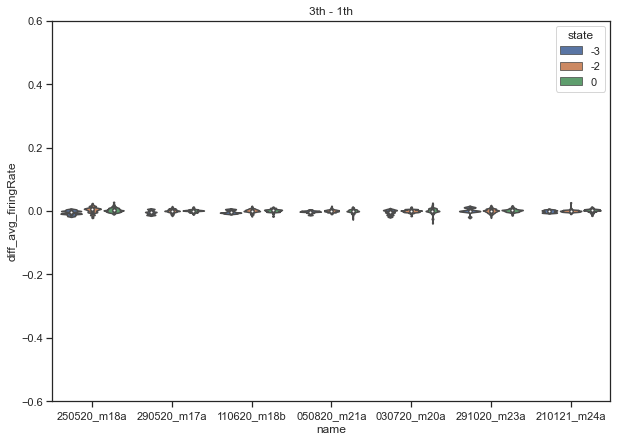

In [ ]:
plt.figure(figsize=(10,7))

# plotting after removing zeros
sns.violinplot(data=df_avg_firingRate_diff[df_avg_firingRate_diff.diff_avg_firingRate!=0],
               y='diff_avg_firingRate', x = 'name', hue='state')
#sns.stripplot(data=df_avg_firingRate_diff[df_avg_firingRate_diff.diff_avg_firingRate!=0], 
#              y='diff_avg_firingRate', x = 'name', hue='state', dodge=1, size = 1)
plt.ylim([-.6, .6])
plt.title('3th - 1th')
#if save_file:
 #   df_avg_firingRate_diff[df_avg_firingRate_diff.diff_avg_firingRate!=0].to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/avg_fr_3th_1st/avg_fr_3th_1st_based_on_top_20%.csv')

In [ ]:
df_avg_firingRate_diff[df_avg_firingRate_diff.diff_avg_firingRate!=0].shape

(40542, 4)

#### Frequency based on least x%

In [ ]:
# difference between first and third subepochs in firing rate

df_avg_firingRate_diff = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 930 and x['epochDuration'] < 10000), data_list))

for indDict in temp_list:
    df_avg_firingRate_diff = df_avg_firingRate_diff.append(pd.DataFrame({'diff_avg_firingRate':(np.where(np.isnan(indDict['div_avg_firing_perSecond'][2]), 0, indDict['div_avg_firing_perSecond'][2]) - np.where(np.isnan(indDict['div_avg_firing_perSecond'][0]), 0, indDict['div_avg_firing_perSecond'][0]))[indDict['least20_avg_firing'][0]], 
                                                                         'name':indDict['mouseName'], 
                                                                         'state': indDict['hypnoState'], 
                                                                         'cellID': cellID(indices=indDict['least20_avg_firing'][0], 
                                                                                            mouse_name=indDict['mouseName'], 
                                                                                            all_mice_names=miceName)}), ignore_index = True)
    
print(f'Fraction of 0 values is: {round(100 * df_avg_firingRate_diff[df_avg_firingRate_diff.diff_avg_firingRate==0].shape[0] / df_avg_firingRate_diff.shape[0])}%')

Fraction of 0 values is: 32%


Text(0.5, 1.0, '3th - 1th')

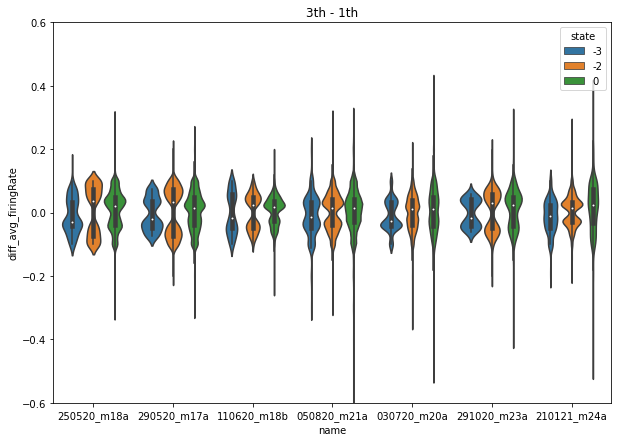

In [ ]:
plt.figure(figsize=(10,7))

# plotting after removing zeros
sns.violinplot(data=df_avg_firingRate_diff[df_avg_firingRate_diff.diff_avg_firingRate!=0],
               y='diff_avg_firingRate', x = 'name', hue='state')
#sns.stripplot(data=df_avg_firingRate_diff[df_avg_firingRate_diff.diff_avg_firingRate!=0], 
#              y='diff_avg_firingRate', x = 'name', hue='state', dodge=1, size = 1)
plt.ylim([-.6, .6])
plt.title('3th - 1th')
#if save_file:
 #   df_avg_firingRate_diff[df_avg_firingRate_diff.diff_avg_firingRate!=0].to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/avg_fr_3th_1st/avg_fr_3th_1st_based_on_least_20%.csv')

In [ ]:
df_avg_firingRate_diff[df_avg_firingRate_diff.diff_avg_firingRate!=0].shape

(32813, 4)

#### Frequency based on top x% of amplitude

In [ ]:
# difference between first and third subepochs in firing rate

df_avg_firingRate_diff = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 930 and x['epochDuration'] < 10000), data_list))

for indDict in temp_list:
    df_avg_firingRate_diff = df_avg_firingRate_diff.append(pd.DataFrame({'diff_avg_firingRate':(np.where(np.isnan(indDict['div_avg_firing_perSecond'][2]), 0, indDict['div_avg_firing_perSecond'][2]) - np.where(np.isnan(indDict['div_avg_firing_perSecond'][0]), 0, indDict['div_avg_firing_perSecond'][0]))[indDict['top20_amplitude'][0]], 
                                                                         'name':indDict['mouseName'], 
                                                                         'state': indDict['hypnoState'], 
                                                                         'cellID': cellID(indices=indDict['top20_amplitude'][0], 
                                                                                            mouse_name=indDict['mouseName'], 
                                                                                            all_mice_names=miceName)}), ignore_index = True)
    
print(f'Fraction of 0 values is: {round(100 * df_avg_firingRate_diff[df_avg_firingRate_diff.diff_avg_firingRate==0].shape[0] / df_avg_firingRate_diff.shape[0])}%')

Fraction of 0 values is: 24%


Text(0.5, 1.0, '3th - 1th')

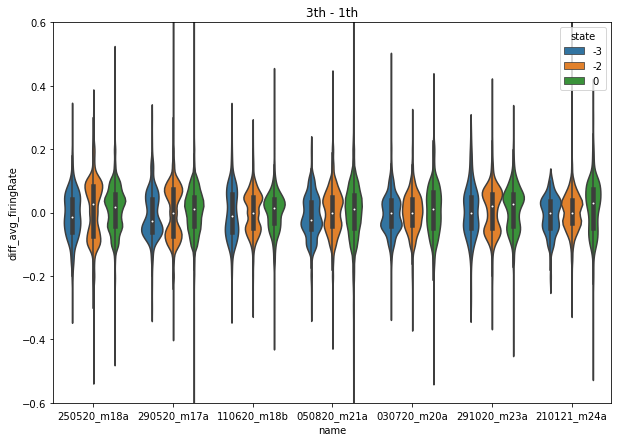

In [ ]:
plt.figure(figsize=(10,7))

# plotting after removing zeros
sns.violinplot(data=df_avg_firingRate_diff[df_avg_firingRate_diff.diff_avg_firingRate!=0],
               y='diff_avg_firingRate', x = 'name', hue='state')
#sns.stripplot(data=df_avg_firingRate_diff[df_avg_firingRate_diff.diff_avg_firingRate!=0], 
#              y='diff_avg_firingRate', x = 'name', hue='state', dodge=1, size = 1)
plt.ylim([-.6, .6])
plt.title('3th - 1th')
#if save_file:
 #   df_avg_firingRate_diff[df_avg_firingRate_diff.diff_avg_firingRate!=0].to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/avg_fr_3th_1st/avg_fr_3th_1st_based_on_top_amp_20%.csv')

In [ ]:
df_avg_firingRate_diff[df_avg_firingRate_diff.diff_avg_firingRate!=0].shape

(36954, 4)

#### Frequency based on least x% of amplitude

In [ ]:
# difference between first and third subepochs in firing rate

df_avg_firingRate_diff = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 930 and x['epochDuration'] < 10000), data_list))

for indDict in temp_list:
    df_avg_firingRate_diff = df_avg_firingRate_diff.append(pd.DataFrame({'diff_avg_firingRate':(np.where(np.isnan(indDict['div_avg_firing_perSecond'][2]), 0, indDict['div_avg_firing_perSecond'][2]) - np.where(np.isnan(indDict['div_avg_firing_perSecond'][0]), 0, indDict['div_avg_firing_perSecond'][0]))[indDict['least20_amplitude'][0]], 
                                                                         'name':indDict['mouseName'], 
                                                                         'state': indDict['hypnoState'], 
                                                                         'cellID': cellID(indices=indDict['least20_amplitude'][0], 
                                                                                            mouse_name=indDict['mouseName'], 
                                                                                            all_mice_names=miceName)}), ignore_index = True)
    
print(f'Fraction of 0 values is: {round(100 * df_avg_firingRate_diff[df_avg_firingRate_diff.diff_avg_firingRate==0].shape[0] / df_avg_firingRate_diff.shape[0])}%')

Fraction of 0 values is: 25%


Text(0.5, 1.0, '3th - 1th')

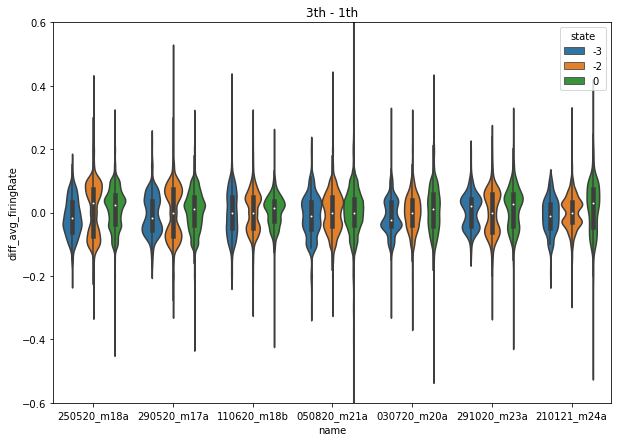

In [ ]:
plt.figure(figsize=(10,7))

# plotting after removing zeros
sns.violinplot(data=df_avg_firingRate_diff[df_avg_firingRate_diff.diff_avg_firingRate!=0],
               y='diff_avg_firingRate', x = 'name', hue='state')
#sns.stripplot(data=df_avg_firingRate_diff[df_avg_firingRate_diff.diff_avg_firingRate!=0], 
#              y='diff_avg_firingRate', x = 'name', hue='state', dodge=1, size = 1)
plt.ylim([-.6, .6])
plt.title('3th - 1th')
#if save_file:
 #   df_avg_firingRate_diff[df_avg_firingRate_diff.diff_avg_firingRate!=0].to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/avg_fr_3th_1st/avg_fr_3th_1st_based_on_least_amp_20%.csv')

In [ ]:
df_avg_firingRate_diff[df_avg_firingRate_diff.diff_avg_firingRate!=0].shape

(36143, 4)

#### Amplitude

In [ ]:
# difference between first and third subepochs in firing rate

df_avg_amplitude_diff = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 930 and x['epochDuration'] < 10000), data_list))

for indDict in temp_list:
    df_avg_amplitude_diff = df_avg_amplitude_diff.append(pd.DataFrame({'diff_avg_amplitude':(np.where(np.isnan(indDict['div_avg_amplitude'][2]), 0, indDict['div_avg_amplitude'][2]) - np.where(np.isnan(indDict['div_avg_amplitude'][0]), 0, indDict['div_avg_amplitude'][0])), 
                                                                       'name':indDict['mouseName'], 
                                                                       'state': indDict['hypnoState'], 
                                                                       'cellID': cellID(indices=np.arange(len(indDict['div_avg_amplitude'][0])), 
                                                                                            mouse_name=indDict['mouseName'], 
                                                                                            all_mice_names=miceName)}), ignore_index = True)
    
print(f'Fraction of 0 values is: {round(100 * df_avg_amplitude_diff[df_avg_amplitude_diff.diff_avg_amplitude==0].shape[0] / df_avg_amplitude_diff.shape[0])}%')

Fraction of 0 values is: 63%


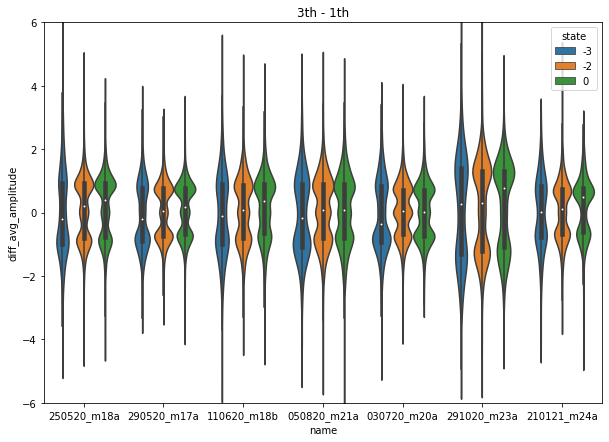

In [ ]:
plt.figure(figsize=(10,7))

# plotting after removing zeros
sns.violinplot(data=df_avg_amplitude_diff[df_avg_amplitude_diff.diff_avg_amplitude!=0],
               y='diff_avg_amplitude', x = 'name', hue='state')
#sns.stripplot(data=df_avg_amplitude_diff[df_avg_amplitude_diff.diff_avg_amplitude!=0], 
#              y='diff_avg_amplitude', x = 'name', hue='state', dodge=1, size = 1)
plt.ylim([-6, 6])
plt.title('3th - 1th')
if save_file:
    df_avg_amplitude_diff.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/avg_amp_3th_1st/avg_amp_3th_1st.csv')

#### Amplitude based on top x%

In [ ]:
# difference between first and third subepochs in firing rate

df_avg_amplitude_diff = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 930 and x['epochDuration'] < 10000), data_list))

for indDict in temp_list:
    df_avg_amplitude_diff = df_avg_amplitude_diff.append(pd.DataFrame({'diff_avg_amplitude':(np.where(np.isnan(indDict['div_avg_amplitude'][2]), 0, indDict['div_avg_amplitude'][2]) - np.where(np.isnan(indDict['div_avg_amplitude'][0]), 0, indDict['div_avg_amplitude'][0]))[indDict['top20_amplitude'][0]], 
                                                                       'name':indDict['mouseName'], 
                                                                       'state': indDict['hypnoState'], 
                                                                       'cellID': cellID(indices=indDict['top20_amplitude'][0], 
                                                                                            mouse_name=indDict['mouseName'], 
                                                                                            all_mice_names=miceName)}), ignore_index = True)
    
print(f'Fraction of 0 values is: {round(100 * df_avg_amplitude_diff[df_avg_amplitude_diff.diff_avg_amplitude==0].shape[0] / df_avg_amplitude_diff.shape[0])}%')

Fraction of 0 values is: 21%


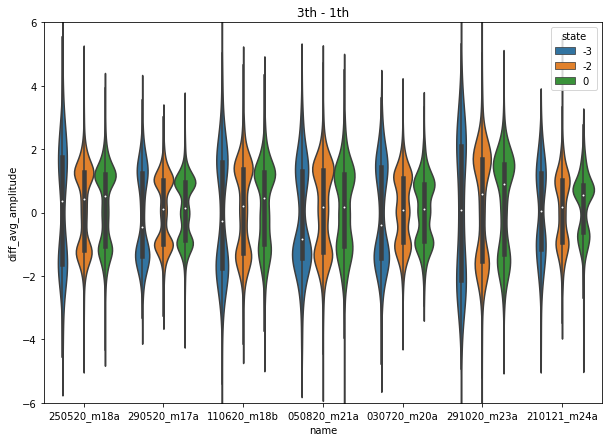

In [ ]:
plt.figure(figsize=(10,7))

# plotting after removing zeros
sns.violinplot(data=df_avg_amplitude_diff[df_avg_amplitude_diff.diff_avg_amplitude!=0],
               y='diff_avg_amplitude', x = 'name', hue='state')
#sns.stripplot(data=df_avg_amplitude_diff[df_avg_amplitude_diff.diff_avg_amplitude!=0], 
#              y='diff_avg_amplitude', x = 'name', hue='state', dodge=1, size = 1)
plt.ylim([-6, 6])
plt.title('3th - 1th')
if save_file:
    df_avg_amplitude_diff.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/avg_amp_3th_1st/avg_amp_3th_1st_based_on_top_20%.csv')

#### Amplitude based on least x%

In [ ]:
# difference between first and third subepochs in firing rate

df_avg_amplitude_diff = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 930 and x['epochDuration'] < 10000), data_list))

for indDict in temp_list:
    df_avg_amplitude_diff = df_avg_amplitude_diff.append(pd.DataFrame({'diff_avg_amplitude':(np.where(np.isnan(indDict['div_avg_amplitude'][2]), 0, indDict['div_avg_amplitude'][2]) - np.where(np.isnan(indDict['div_avg_amplitude'][0]), 0, indDict['div_avg_amplitude'][0]))[indDict['least20_amplitude'][0]], 
                                                                       'name':indDict['mouseName'], 
                                                                       'state': indDict['hypnoState'], 
                                                                       'cellID': cellID(indices=indDict['least20_amplitude'][0], 
                                                                                            mouse_name=indDict['mouseName'], 
                                                                                            all_mice_names=miceName)}), ignore_index = True)
    
print(f'Fraction of 0 values is: {round(100 * df_avg_amplitude_diff[df_avg_amplitude_diff.diff_avg_amplitude==0].shape[0] / df_avg_amplitude_diff.shape[0])}%')

Fraction of 0 values is: 23%


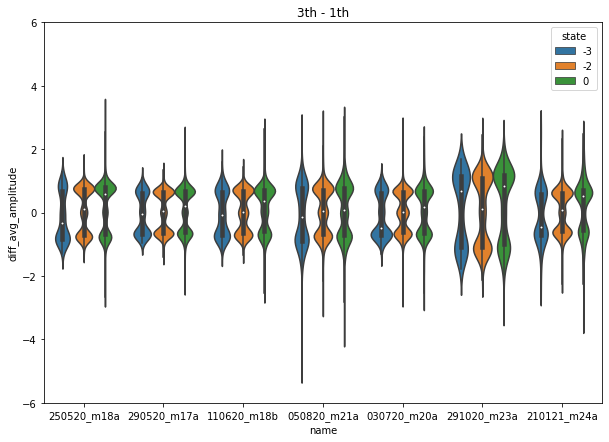

In [ ]:
plt.figure(figsize=(10,7))

# plotting after removing zeros
sns.violinplot(data=df_avg_amplitude_diff[df_avg_amplitude_diff.diff_avg_amplitude!=0],
               y='diff_avg_amplitude', x = 'name', hue='state')
#sns.stripplot(data=df_avg_amplitude_diff[df_avg_amplitude_diff.diff_avg_amplitude!=0], 
#              y='diff_avg_amplitude', x = 'name', hue='state', dodge=1, size = 1)
plt.ylim([-6, 6])
plt.title('3th - 1th')
if save_file:
    df_avg_amplitude_diff.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/avg_amp_3th_1st/avg_amp_3th_1st_based_on_least_20%.csv')

#### Amplitude based on top x% of firing rate

In [ ]:
# difference between first and third subepochs in firing rate

df_avg_amplitude_diff = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 930 and x['epochDuration'] < 10000), data_list))

for indDict in temp_list:
    df_avg_amplitude_diff = df_avg_amplitude_diff.append(pd.DataFrame({'diff_avg_amplitude':(np.where(np.isnan(indDict['div_avg_amplitude'][2]), 0, indDict['div_avg_amplitude'][2]) - np.where(np.isnan(indDict['div_avg_amplitude'][0]), 0, indDict['div_avg_amplitude'][0]))[indDict['top20_avg_firing'][0]], 
                                                                       'name':indDict['mouseName'], 
                                                                       'state': indDict['hypnoState'], 
                                                                       'cellID': cellID(indices=indDict['top20_avg_firing'][0], 
                                                                                            mouse_name=indDict['mouseName'], 
                                                                                            all_mice_names=miceName)}), ignore_index = True)
    
print(f'Fraction of 0 values is: {round(100 * df_avg_amplitude_diff[df_avg_amplitude_diff.diff_avg_amplitude==0].shape[0] / df_avg_amplitude_diff.shape[0])}%')

Fraction of 0 values is: 11%


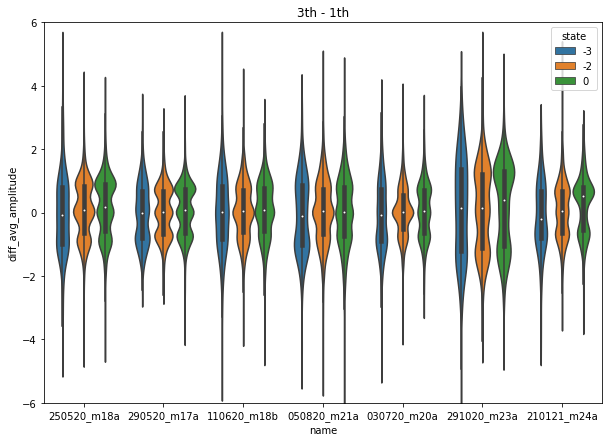

In [ ]:
plt.figure(figsize=(10,7))

# plotting after removing zeros
sns.violinplot(data=df_avg_amplitude_diff[df_avg_amplitude_diff.diff_avg_amplitude!=0],
               y='diff_avg_amplitude', x = 'name', hue='state')
#sns.stripplot(data=df_avg_amplitude_diff[df_avg_amplitude_diff.diff_avg_amplitude!=0], 
#              y='diff_avg_amplitude', x = 'name', hue='state', dodge=1, size = 1)
plt.ylim([-6, 6])
plt.title('3th - 1th')
if save_file:
    df_avg_amplitude_diff.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/avg_amp_3th_1st/avg_amp_3th_1st_based_on_top_fr_20%.csv')

#### Amplitude based on least x% of firing rate

In [ ]:
# difference between first and third subepochs in firing rate

df_avg_amplitude_diff = pd.DataFrame()
temp_list = []
temp_list = list(filter(lambda x: (x['epochDuration'] > 930 and x['epochDuration'] < 10000), data_list))

for indDict in temp_list:
    df_avg_amplitude_diff = df_avg_amplitude_diff.append(pd.DataFrame({'diff_avg_amplitude':(np.where(np.isnan(indDict['div_avg_amplitude'][2]), 0, indDict['div_avg_amplitude'][2]) - np.where(np.isnan(indDict['div_avg_amplitude'][0]), 0, indDict['div_avg_amplitude'][0]))[indDict['least20_avg_firing'][0]], 
                                                                       'name':indDict['mouseName'], 
                                                                       'state': indDict['hypnoState'], 
                                                                       'cellID': cellID(indices=indDict['least20_avg_firing'][0], 
                                                                                            mouse_name=indDict['mouseName'], 
                                                                                            all_mice_names=miceName)}), ignore_index = True)
    
print(f'Fraction of 0 values is: {round(100 * df_avg_amplitude_diff[df_avg_amplitude_diff.diff_avg_amplitude==0].shape[0] / df_avg_amplitude_diff.shape[0])}%')

Fraction of 0 values is: 32%


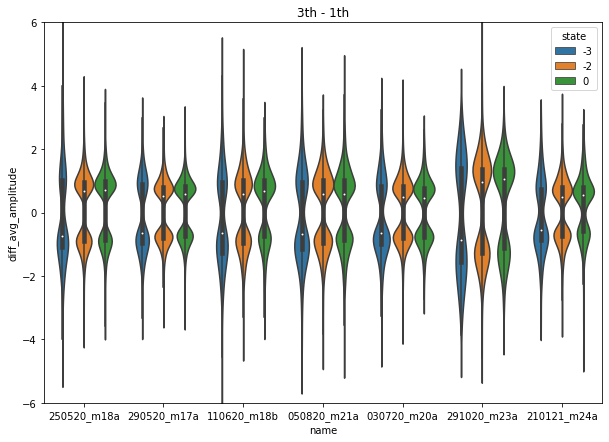

In [ ]:
plt.figure(figsize=(10,7))

# plotting after removing zeros
sns.violinplot(data=df_avg_amplitude_diff[df_avg_amplitude_diff.diff_avg_amplitude!=0],
               y='diff_avg_amplitude', x = 'name', hue='state')
#sns.stripplot(data=df_avg_amplitude_diff[df_avg_amplitude_diff.diff_avg_amplitude!=0], 
#              y='diff_avg_amplitude', x = 'name', hue='state', dodge=1, size = 1)
plt.ylim([-6, 6])
plt.title('3th - 1th')
if save_file:
    df_avg_amplitude_diff.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/avg_amp_3th_1st/avg_amp_3th_1st_based_on_least_fr_20%.csv')

In [ ]:
# THIPLLET WITH n DIVISION 
# SWS REM SWSn+1
# SWS AWAKE SWSn+1
# AWAKE SWS REM SWSn+1


In [ ]:
# Spindles 

### Read and write data as JSON file

In [ ]:
with open('I:/Marco/analysis_nima/allData_JSON/fullData_with_analyses.json', 'w') as wr:
    json.dump(data_list , wr, cls=NumpyEncoder)

In [ ]:
with open(r"I:/Marco/analysis_nima/allData_JSON/fullData_with_analyses.json", "r") as read_file:
    data_list = json.load(read_file)

In [ ]:
# change lists to array
[data_dict.update({key: np.asarray(data_dict[key])}) for data_dict in data_list for key in data_dict.keys() if isinstance(data_dict[key], list)];

In [ ]:
x=[0.43,0.05,0.03,0.49]

In [ ]:
x

[0.43, 0.05, 0.03, 0.49]

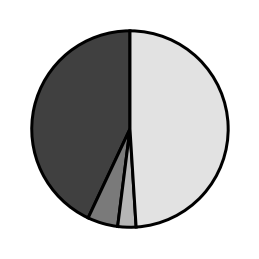

In [ ]:
#define Seaborn color palette to use
#colors = sns.color_palette("dark")[2:10]
#colors =sns.color_palette("Paired")
colors =seq_col_brew = sns.color_palette("Greys_r", 4)
#create pie chart
plt.pie(x,startangle = 90, colors=colors, wedgeprops = {"edgecolor" : "black",'linewidth': 3,'antialiased': True})
#plt.show()
plt.savefig('L:/analysis_nima/epoch_based_analysis/state_active_cells/active_cells_pie_chart_sws_spi_slo.pdf', dpi=800)  


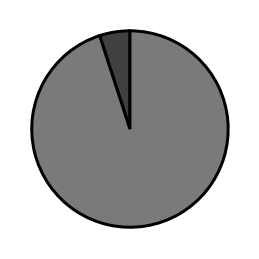

In [ ]:
###spindle_active cells
x=[0.05,0.95]
colors =seq_col_brew = sns.color_palette("Greys_r", 4)
#create pie chart
plt.pie(x,startangle = 90, colors=colors, wedgeprops = {"edgecolor" : "black",'linewidth': 3,'antialiased': True})
#plt.show()
plt.savefig('L:/analysis_nima/epoch_based_analysis/state_active_cells/active_cells_pie_chart_spindle.pdf', dpi=800)  


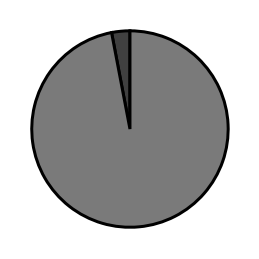

In [ ]:
###SO_active cells
x=[0.03,0.97]
colors =seq_col_brew = sns.color_palette("Greys_r", 4)
#create pie chart
plt.pie(x,startangle = 90, colors=colors, wedgeprops = {"edgecolor" : "black",'linewidth': 3,'antialiased': True})
#plt.show()
plt.savefig('L:/analysis_nima/epoch_based_analysis/state_active_cells/active_cells_pie_chart_slo.pdf', dpi=800)  


TypeError: 'str' object is not callable

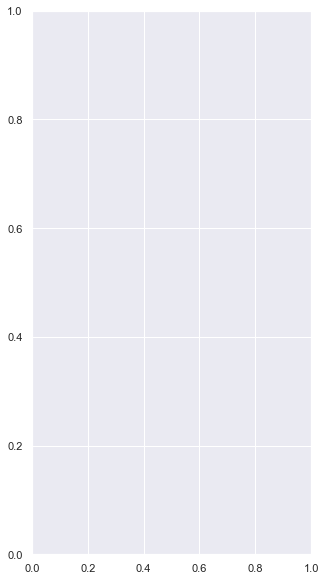

In [ ]:
#colors = sns.color_palette('pastel')[0:5]

#create pie chart
ax = plt.subplots( figsize=(5, 10))
#colors = sns.color_palette('bright')[0:4]
colors = sns.color_palette('pastel')[0:5]
#create pie chart
plt.pie(x,startangle = 90, colors=colors, wedgeprops = {"edgecolor" : "black",'linewidth': 10,'antialiased': True})
plt.show                     
#plt.savefig('L:/analysis_nima/epoch_based_analysis/state_active_cells/active_cells_pie_chart_awake.pdf', dpi=800)  


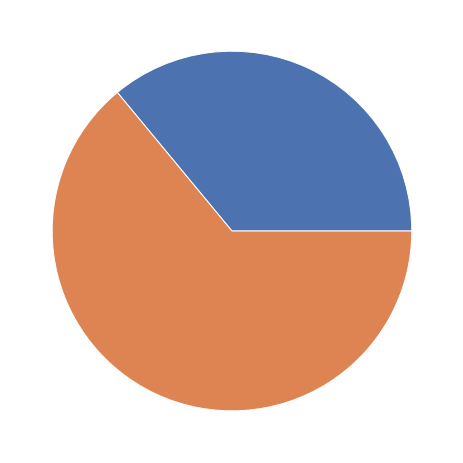

In [ ]:
plt.pie(x)
plt.show()

TypeError: 'str' object is not callable

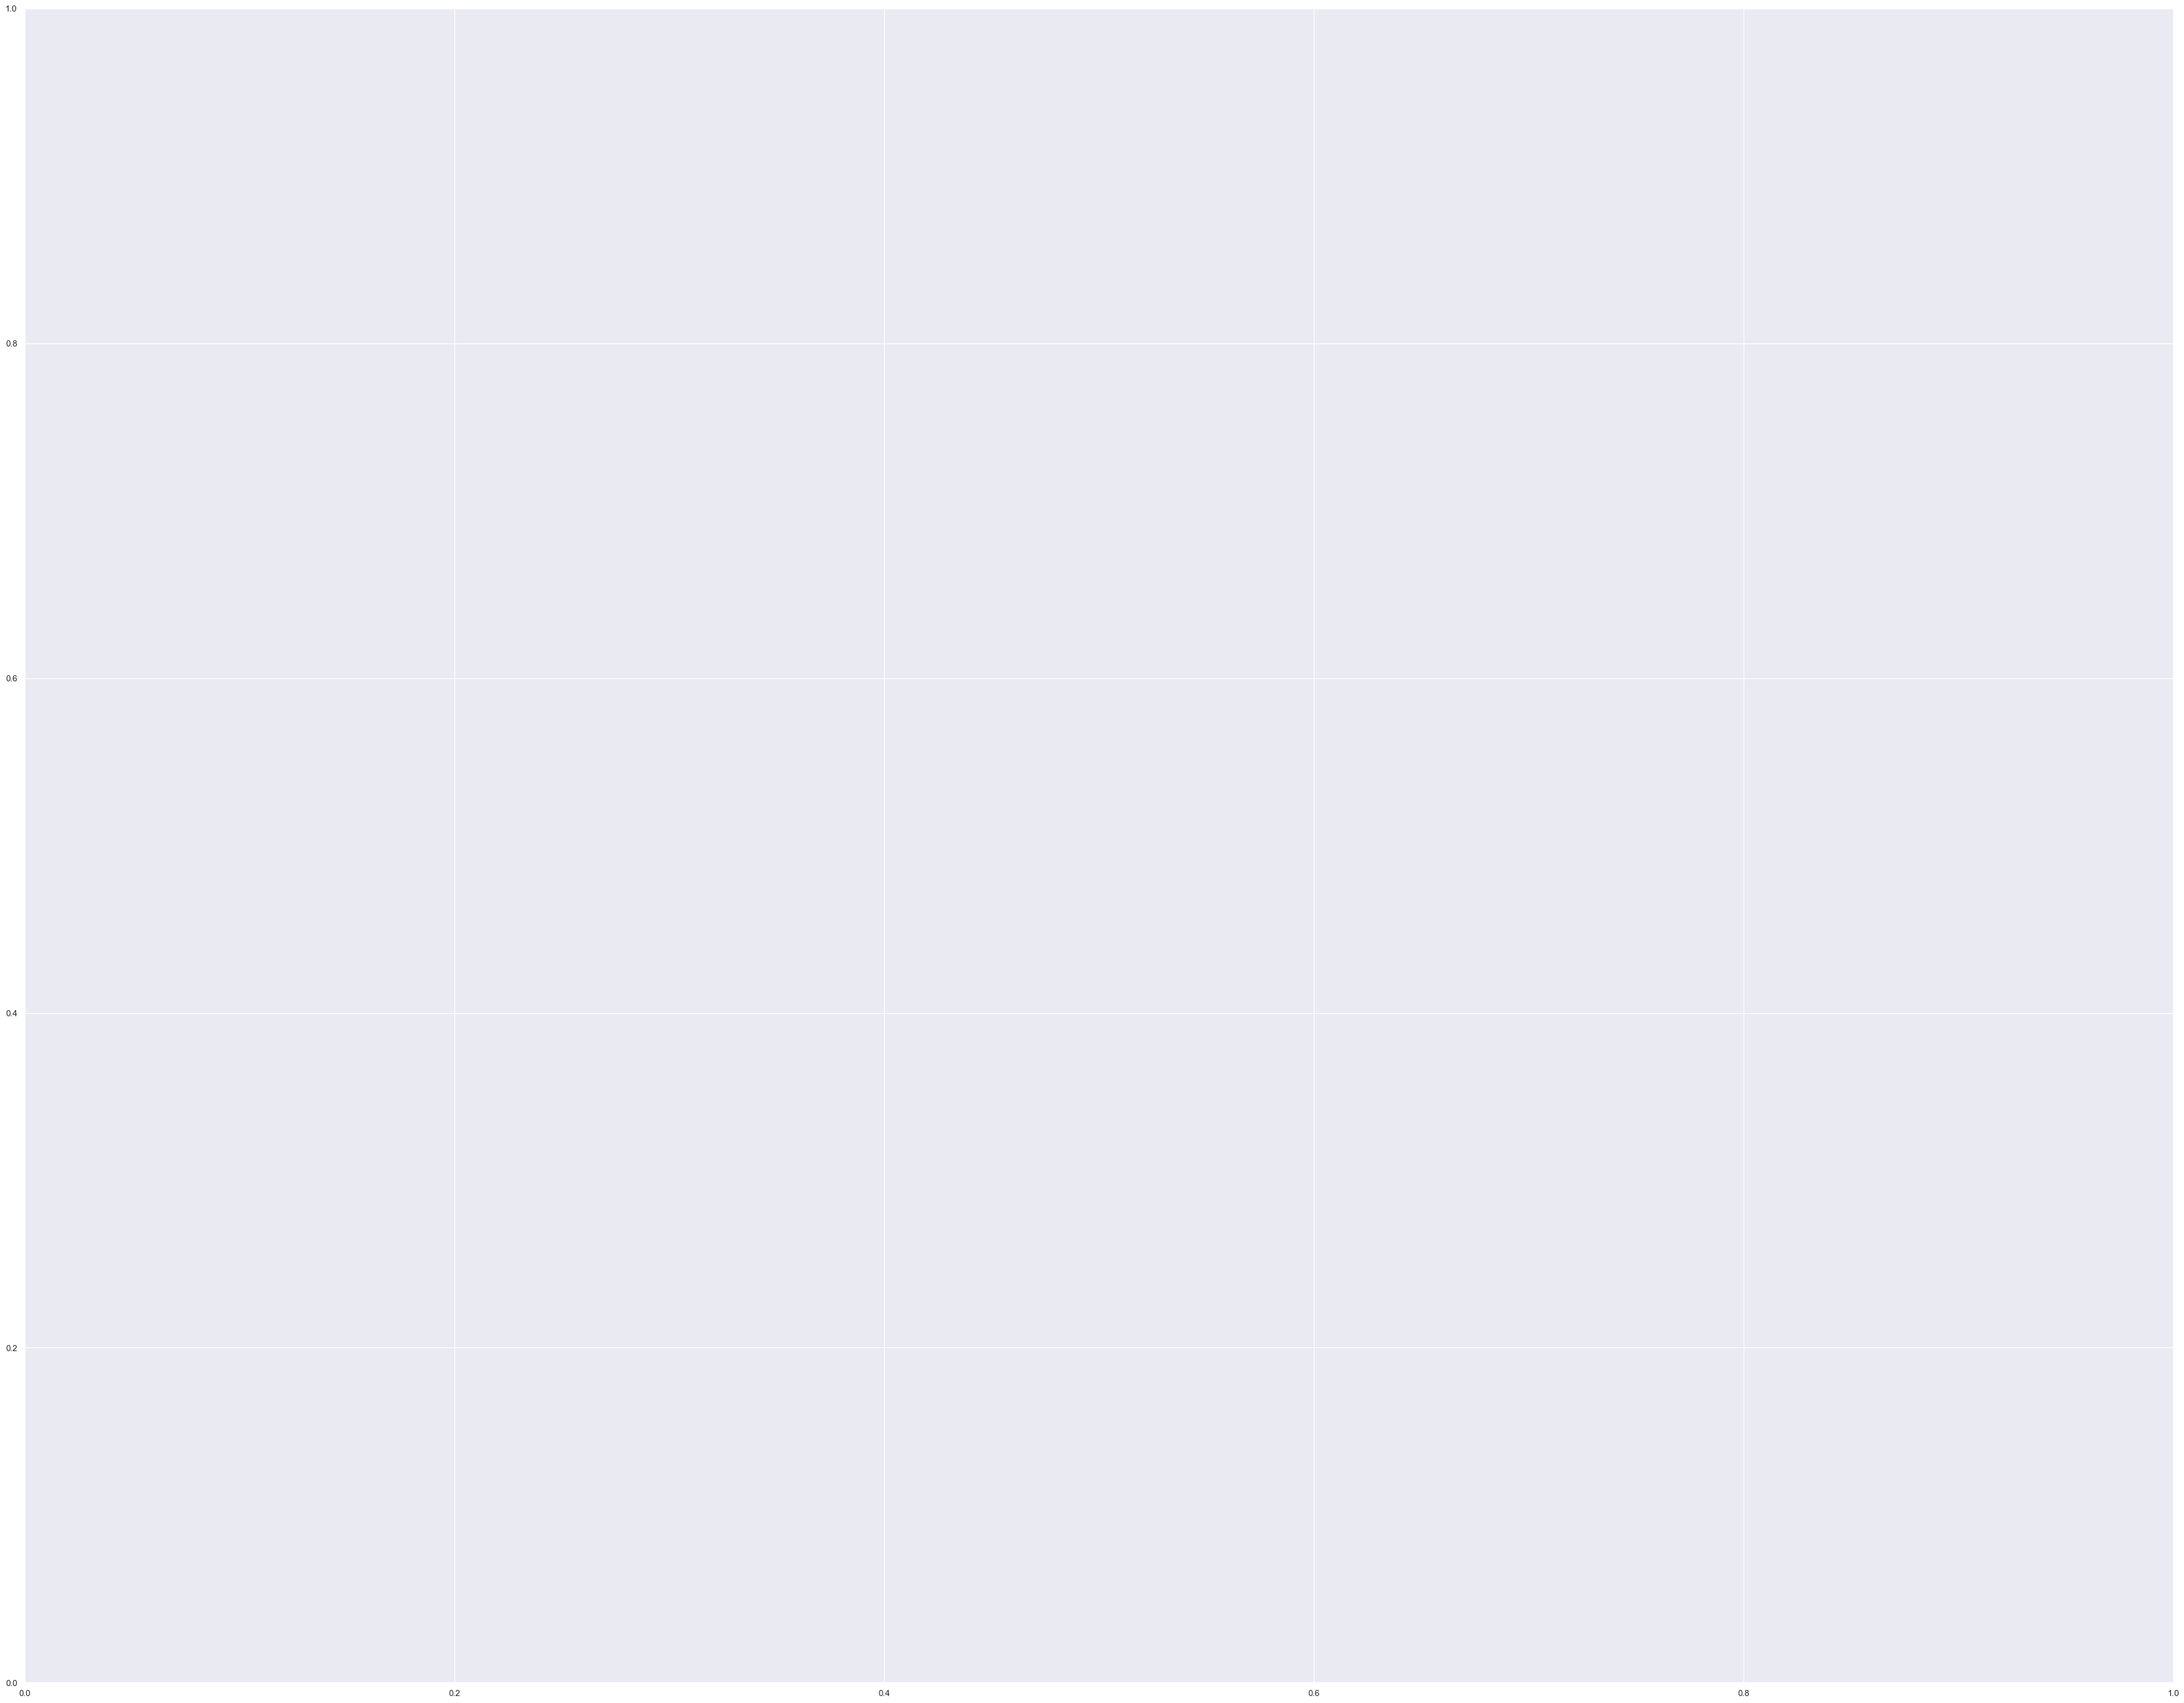

In [ ]:
ax = plt.subplots( figsize=(50, 40))
colors = sns.color_palette('bright')[0:4]

#create pie chart
plt.pie(x, colors = colors,startangle = 90,wedgeprops = {"edgecolor" : "black",
                      'linewidth': 10,
                      'antialiased': True})
plt.savefig('L:/analysis_nima/epoch_based_analysis/state_active_cells/active_cells_pie_chart_rem.pdf', dpi=900)  
